gdoc related to the notebook: https://docs.google.com/document/d/1w0zZqsDJWYGjmN1j5elaIybE9qkt5RQOAVY5gTLGIlo/edit?usp=sharing

In [60]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import zoom

# Imports

In [61]:
# import skeletons, their labels etc
skels = np.load("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton.npy")
subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton_subject.csv")
subjects_labels = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/base/ACCpatterns_supervised_results/ACC_outputs/full_outputs.csv")

subjects_labels['preds'] = np.where(subjects_labels.dim1 < subjects_labels.dim2, 1, 0) 

print(skels.shape, subjects.shape, subjects_labels.shape)
print(subjects.head())
print("Global accuracy", np.mean(subjects_labels.labels == subjects_labels.preds))
subjects_labels

(341, 17, 40, 38, 1) (341, 1) (341, 5)
        Subject
0  1-03HUBJO_t0
1  1-08ANDTI_t0
2  1-11LEBJO_t0
3  1-15LEHMI_t0
4  1-17COLMA_t0
Global accuracy 0.906158357771261


ID  labels      dim1      dim2  preds
0                            1-11LEBJO_t0       1  0.952729  1.743722      1
1                            1-15LEHMI_t0       0  3.741243  0.646505      0
2                            1-17COLMA_t0       0  4.427067 -0.006810      0
3                            1-18ROUCO_t0       0  4.614058 -0.007430      0
4                            1-20FORHU_t0       0  3.501430 -0.001544      0
..                                    ...     ...       ...       ...    ...
336  sub-inhibition10_ses-pretraining_T1w       0  2.401234 -0.004864      0
337  sub-inhibition14_ses-pretraining_T1w       1  3.275207 -0.007702      0
338  sub-inhibition23_ses-pretraining_T1w       0  4.103655 -0.003292      0
339  sub-inhibition28_ses-pretraining_T1w       0  2.123475  0.657446      0
340  sub-inhibition31_ses-pretraining_T1w       0  2.883292 -0.001397      0

[341 rows x 5 columns]

In [62]:
# binarize skels
print(np.unique(skels))
skels = np.where(skels >= 1, 1, 0)
print(np.unique(skels), skels.shape)

[  0  30  60 100 110 120]
[0 1] (341, 17, 40, 38, 1)


In [63]:
grad_pickle_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/base/ACCpatterns_supervised_results/attributions.pkl"

with open(grad_pickle_path, 'rb') as file:
    grads_final = pickle.load(file)

grads_final

{'train': {'0': {'1-11LEBJO_t0': array([[[[0.00030622, 0.02245484, 0.03486762, 0.00078908],
            [0.01429663, 0.03816801, 0.01000583, 0.01422376],
            [0.        , 0.03541876, 0.01127667, 0.00298111],
            [0.02591966, 0.01359609, 0.02646831, 0.00550766],
            [0.00766558, 0.00182688, 0.        , 0.00110156]],
   
           [[0.00331601, 0.00120778, 0.03644798, 0.01384725],
            [0.0069813 , 0.04267865, 0.02062993, 0.01720768],
            [0.01362748, 0.00022   , 0.03084815, 0.00073754],
            [0.01303998, 0.02320953, 0.01525342, 0.00755182],
            [0.00142915, 0.0200637 , 0.        , 0.        ]]]],
         dtype=float32),
   '1-15LEHMI_t0': array([[[[0.0000000e+00, 0.0000000e+00, 7.3967203e-03, 2.7477510e-02],
            [0.0000000e+00, 1.7220899e-02, 5.2373346e-02, 3.2195836e-02],
            [0.0000000e+00, 3.8685702e-02, 1.7835921e-02, 0.0000000e+00],
            [1.2519304e-03, 4.8760198e-02, 1.8697605e-02, 6.9984002e-05],
     

In [64]:
print(grads_final.keys())

print(grads_final['train'].keys())  # 0 and 1 are the classes

print(len(grads_final['train']['0'].keys()))

print(grads_final['train']['0']['1-11LEBJO_t0'].shape)
print(grads_final['train']['1']['1-11LEBJO_t0'].shape)

print(grads_final['train']['0']['1-11LEBJO_t0'])
print('')
print(grads_final['train']['1']['1-11LEBJO_t0'])

dict_keys(['train', 'val', 'test'])
dict_keys(['0', '1'])
246
(1, 2, 5, 4)
(1, 2, 5, 4)
[[[[0.00030622 0.02245484 0.03486762 0.00078908]
   [0.01429663 0.03816801 0.01000583 0.01422376]
   [0.         0.03541876 0.01127667 0.00298111]
   [0.02591966 0.01359609 0.02646831 0.00550766]
   [0.00766558 0.00182688 0.         0.00110156]]

  [[0.00331601 0.00120778 0.03644798 0.01384725]
   [0.0069813  0.04267865 0.02062993 0.01720768]
   [0.01362748 0.00022    0.03084815 0.00073754]
   [0.01303998 0.02320953 0.01525342 0.00755182]
   [0.00142915 0.0200637  0.         0.        ]]]]

[[[[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.00103853 0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.     

#### Check that the orientation of skels during training (and therefore gradients) is the same than the one in the numpy saved

Corresponding index: 297


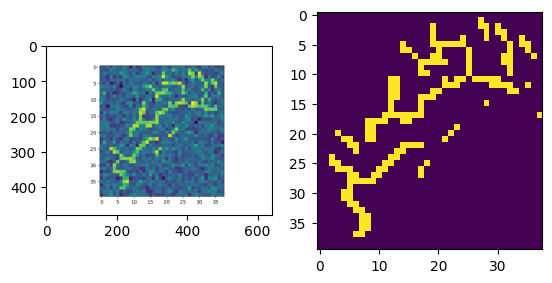

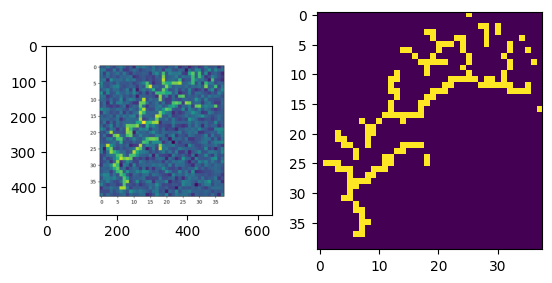

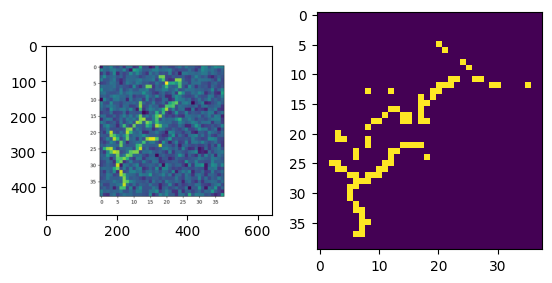

In [65]:
# import images saved during training in order to check visually that the orientation is the same
im9 = plt.imread("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/test_orientation/sub-active04_ses-pretraining_T1w_9.png")
im10 = plt.imread("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/test_orientation/sub-active04_ses-pretraining_T1w_10.png")
im11 = plt.imread("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/test_orientation/sub-active04_ses-pretraining_T1w_11.png")

# load the related skeleton
sub_name = 'sub-active04_ses-pretraining_T1w'
idx = subjects[subjects.Subject == sub_name].index[0]
print("Corresponding index:", idx)
skel_sub = skels[idx, ..., 0]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im9)
plt.subplot(1,2,2)
plt.imshow(skel_sub[9,...])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im10)
plt.subplot(1,2,2)
plt.imshow(skel_sub[10,...])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im11)
plt.subplot(1,2,2)
plt.imshow(skel_sub[11,...])

# Individual subject display

Chosen subject: nih_chp_01211_t1
Corresponding index: 115
(17, 40, 38)
True label 0
Predicted label 0


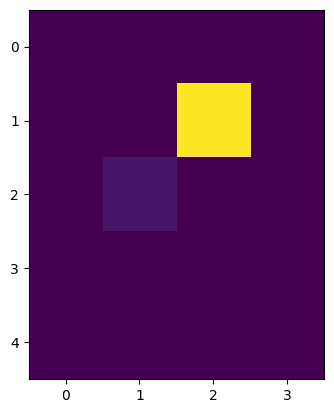

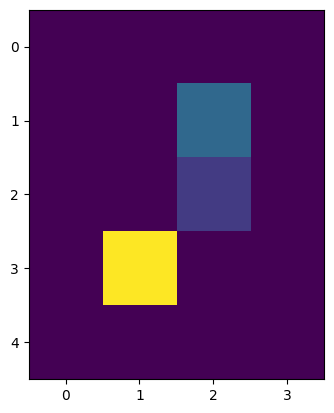

In [66]:
sub_name = np.random.choice(list(grads_final['train']['0'].keys()))
print("Chosen subject:", sub_name)

idx = subjects[subjects.Subject == sub_name].index[0]
print("Corresponding index:", idx)
skel_sub = skels[idx, ..., 0]
print(skel_sub.shape)

sub_label = str(subjects_labels[subjects_labels.ID == sub_name].labels.values[0])
print("True label", sub_label)
sub_pred = str(subjects_labels[subjects_labels.ID == sub_name].preds.values[0])
print("Predicted label", sub_pred)

grads_ind = grads_final['train'][sub_label][sub_name][0]

plt.imshow(grads_ind[0])
plt.figure()
plt.imshow(grads_ind[1])

(2, 5, 4) (341, 17, 40, 38, 1)


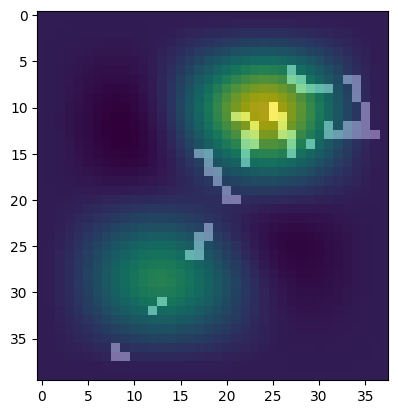

In [67]:
print(grads_ind.shape, skels.shape)
resize_ratio = np.divide(skels.shape[1:-1], grads_ind.shape)

upsampled_grads_ind = zoom(grads_ind, zoom=resize_ratio)
plt.imshow(skel_sub[10,:,], cmap='gray')
plt.imshow(upsampled_grads_ind[10], alpha=0.7)

In [81]:
def grad_cam_sub(sub_name, grads, skels, subjects, subjects_labels):
    """Display the gradients map slice by slice for a single subject.
    It also shows for context the subject's skeleton superposed with the gradients
    map.
    
    Arguments:
        - sub_name: name of the subject, as it is saved in the subjects csv.
        - grads: gradients maps for all subjects, as saved in attributions.
        - the skeletons numpy where to look for the subject's skeleton.
        - the list of subjects ordered the same way as the numpy.
        - the csv containing the true and predicted labels of the subject."""
    print("Chosen subject:", sub_name)
    idx = subjects[subjects.Subject == sub_name].index[0]
    print("Corresponding index:", idx)
    # get the skeleton of the subject
    skel_sub = skels[idx, ..., 0]

    # get its true and predited labels
    sub_label = str(subjects_labels[subjects_labels.ID == sub_name].labels.values[0])
    print("True label:", sub_label)
    pred_label = str(subjects_labels[subjects_labels.ID == sub_name].preds.values[0])
    print("Predicted label:", pred_label)

    # get the grad map and resample it to the skel size
    try:
        grads_ind = grads['train'][pred_label][sub_name][0]
    except:
        try:
            grads_ind = grads['val'][pred_label][sub_name][0]
        except:
            try:
                grads_ind = grads['test'][pred_label][sub_name][0]
            except:
                raise ValueError(f"{sub_name} not a subject of the set")
    resize_ratio = np.divide(skels.shape[1:-1], grads_ind.shape)
    upsampled_grads_ind = zoom(grads_ind, zoom=resize_ratio)

    plt.figure(figsize=(26,12))
    for i in range(skel_sub.shape[0]):
        plt.subplot(3,6,i+1)
        plt.imshow(skel_sub[i,:,], cmap='gray')
        plt.imshow(upsampled_grads_ind[i], alpha=0.7)

Chosen subject: nih_chp_03777_t1
Corresponding index: 162
True label: 0
Predicted label: 0


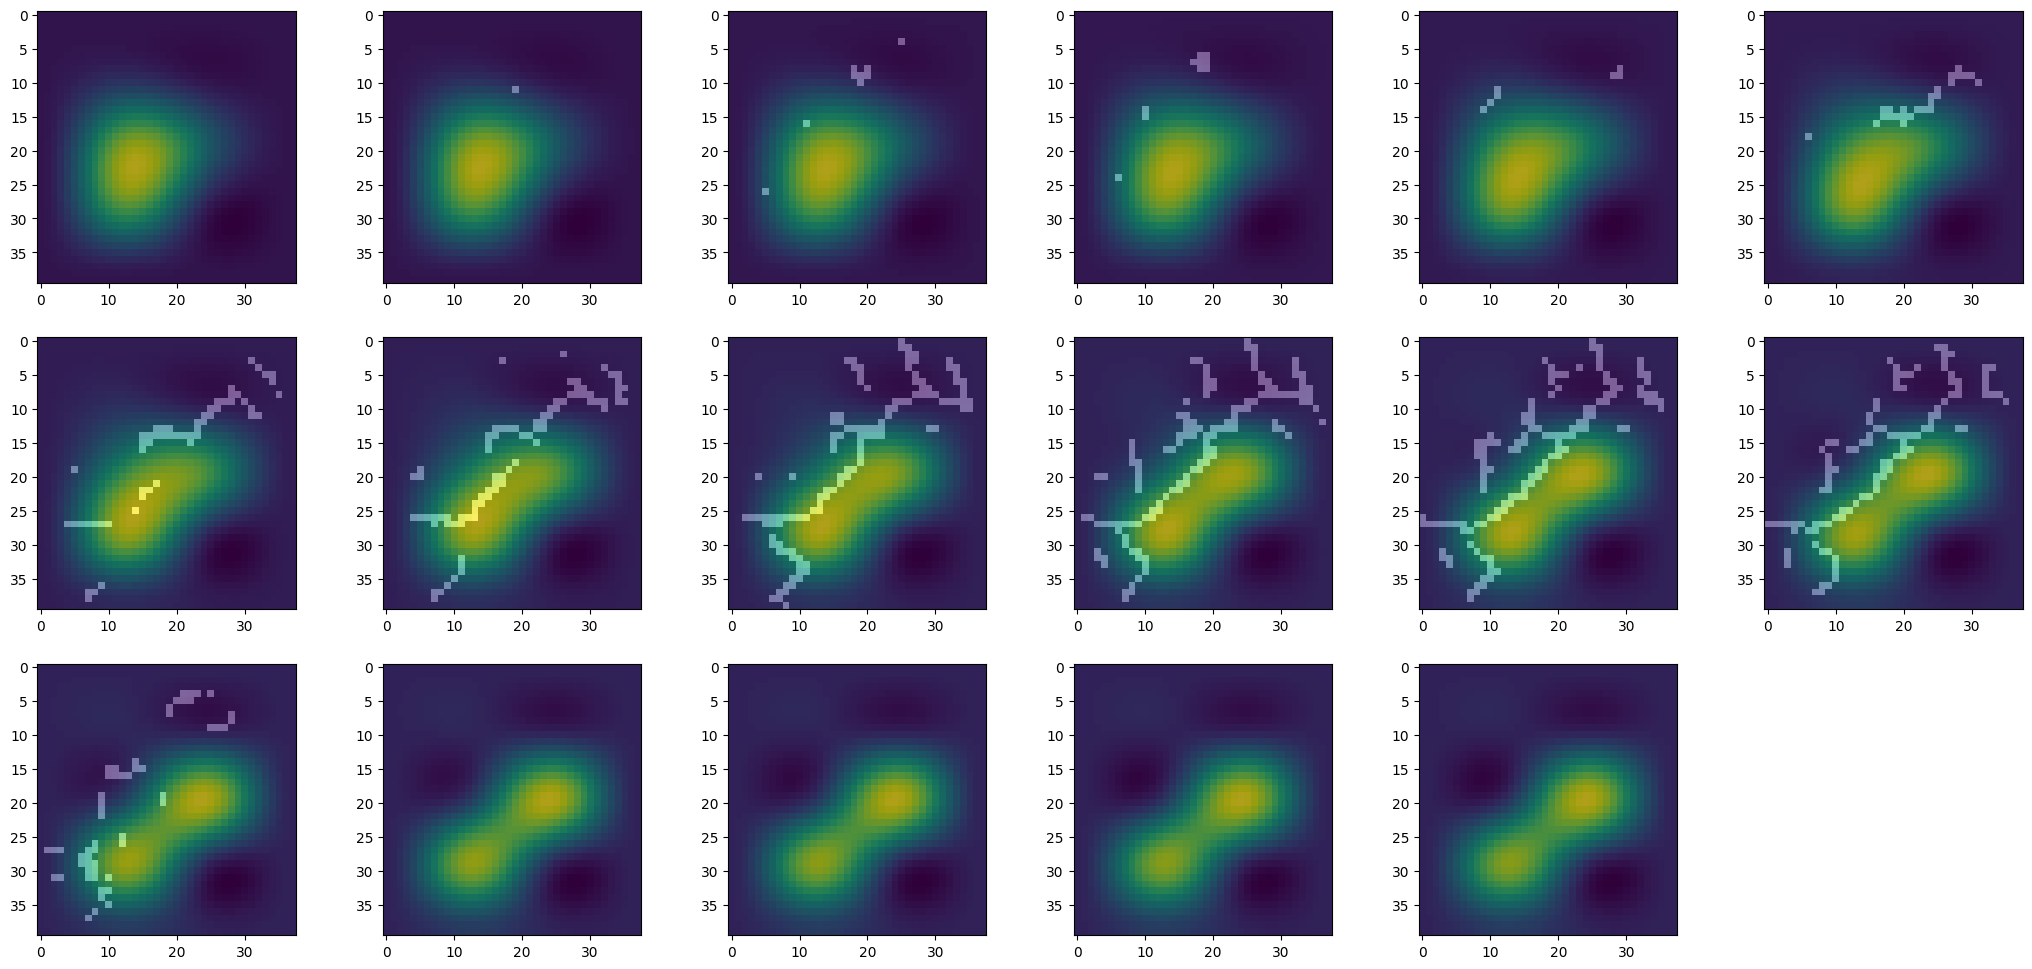

In [69]:
sub_name = np.random.choice(list(grads_final['train']['0'].keys()))
grad_cam_sub(sub_name, grads_final, skels, subjects, subjects_labels)

# Aggregated display

In [17]:
def compute_aggregated_skel(skels, threshold):
    """Compute the mean of skels voxel by voxel, then keep only the most represented voxels,
    i.e. the (1-threshold)*100 % with highest occurence."""
    mean_skel = np.squeeze(np.mean(skels, axis=0))

    # keep only the most represented voxels and binarize
    max_vox = np.max(mean_skel)
    agg_skel = np.where(mean_skel > max_vox*(1-threshold), 1, 0)

    return agg_skel

In [18]:
def display_aggregated(gradients, skeletons, subjects, list_subjects, 
                       common_label, threshold, test_intra=False):
    """Arguments:
        - gradients: dictionary saved during supervised_pipeline containing the gradients map
        of each subject.
        - skeletons: a skeleton matrix containing at least all the subjects' skeletons.
        - subjects: a csv giving the indices corresponding to the subjects' names.
        - list_subjects: the list of subjects to visualize together.
        - common_label: the predicted label of the subjects. They must all share the same.
        common_label is used to choose which gradient maps to display.
        - threshold used when aggregating skeletons for final view.
        - test_intra: True if test_intra is used for the chosen dataset."""
    
    # select the targeted subjects
    sub_idx = list(subjects[subjects.Subject.isin(list_subjects)].index)
    sub_skels = skeletons[sub_idx]
    print("N subjects:", sub_skels.shape[0])

    # reorganizing the grads
    target_class_grads = {}
    subsets = ['train', 'val', 'test']
    if test_intra:
        subsets.append('test_intra')
    for subset in subsets:
        target_class_grads.update(gradients[subset][common_label])
    grads = [target_class_grads[sub] for sub in list_subjects]

    # compute the mean of all the gradients and display it
    mean_grads = np.squeeze(np.mean(grads, axis=0))
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(mean_grads[0])
    plt.subplot(1,2,2)
    plt.imshow(mean_grads[1])
    plt.show()

    # compute the aggregated skeleton
    agg_skel = compute_aggregated_skel(sub_skels, threshold)

    # upsample the gradient to match the skeleton size
    resize_ratio = np.divide(agg_skel.shape, mean_grads.shape)
    upsampled_grads = zoom(mean_grads, zoom=resize_ratio)

    # display all the slices along the first axis
    plt.figure(figsize=(26,12))
    for i in range(agg_skel.shape[0]):
        plt.subplot(3,6,i+1)
        plt.imshow(agg_skel[i,:,], cmap='gray')
        plt.imshow(upsampled_grads[i], alpha=0.7)
    plt.show()

In [19]:
# get the IDs of True Positives and True Negatives
TP = subjects_labels[(subjects_labels.labels == 1) & (subjects_labels.preds == 1)].ID.values
TN = subjects_labels[(subjects_labels.labels == 0) & (subjects_labels.preds == 0)].ID.values

N subjects: 127


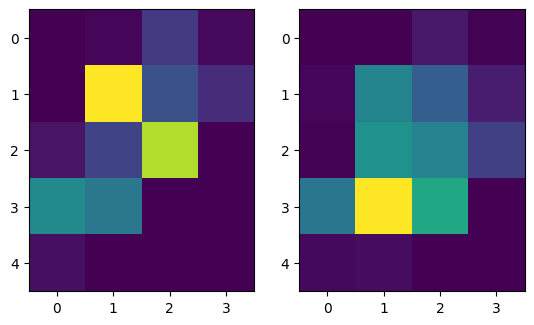

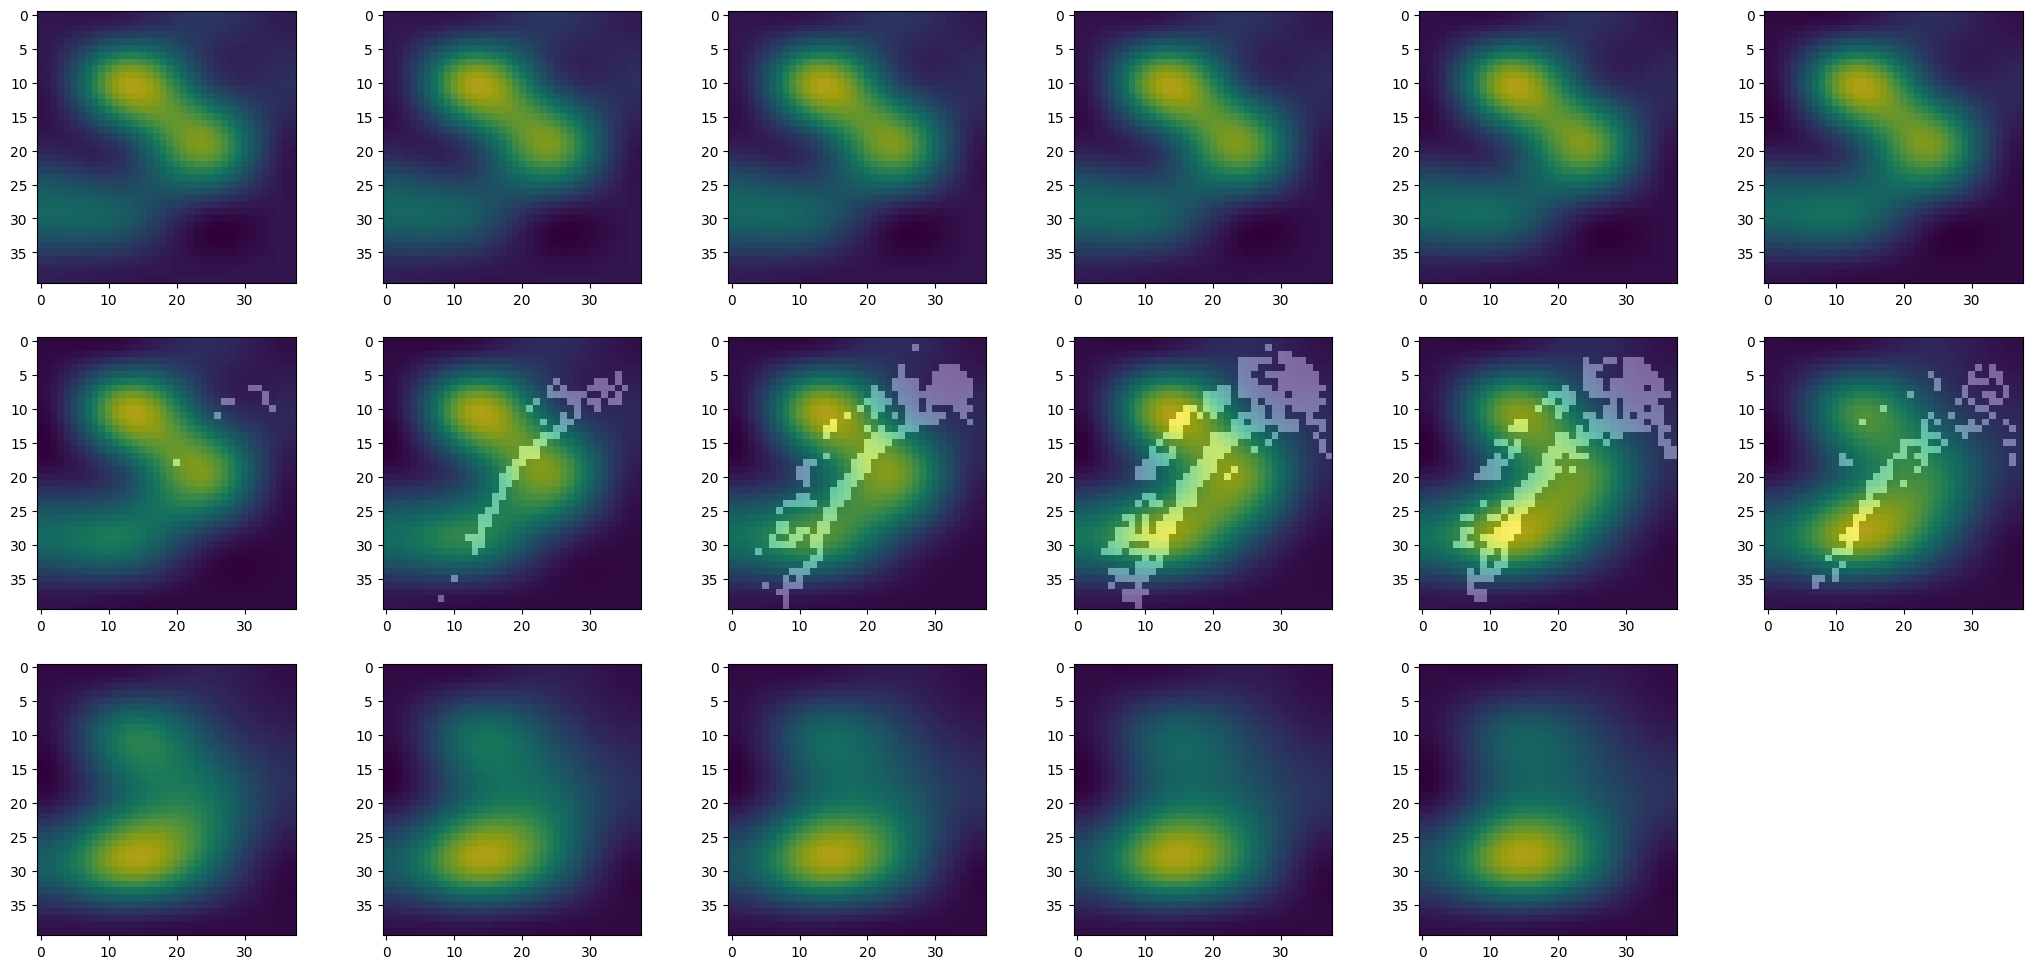

In [20]:
# display True positives
display_aggregated(grads_final, skels, subjects, TP,
                   '1', 0.4)

N subjects: 182


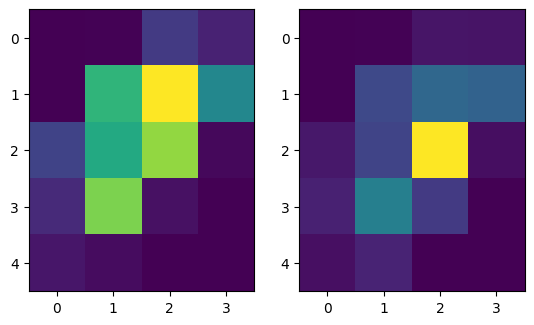

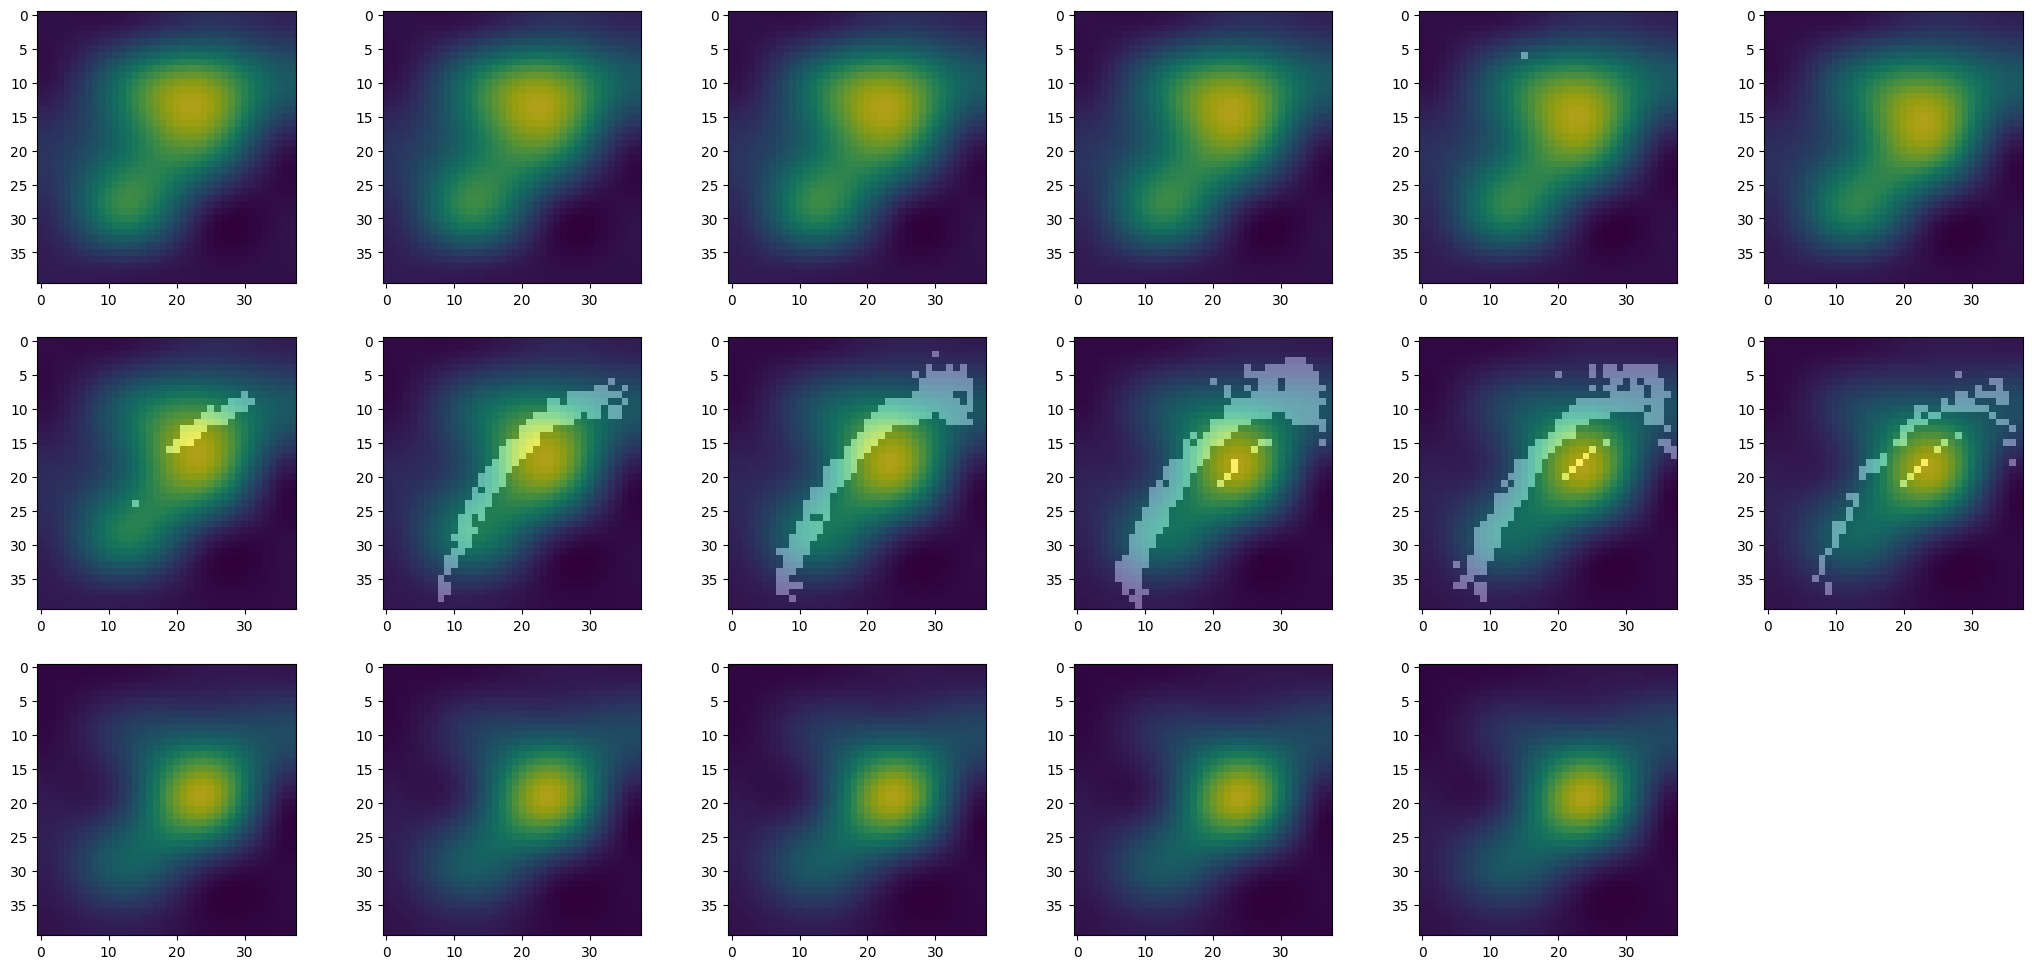

In [24]:
# display True Negatives
display_aggregated(grads_final, skels, subjects, TN,
                   '0', 0.4)

15
N subjects: 15


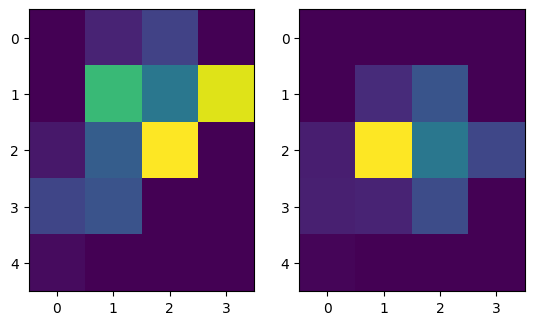

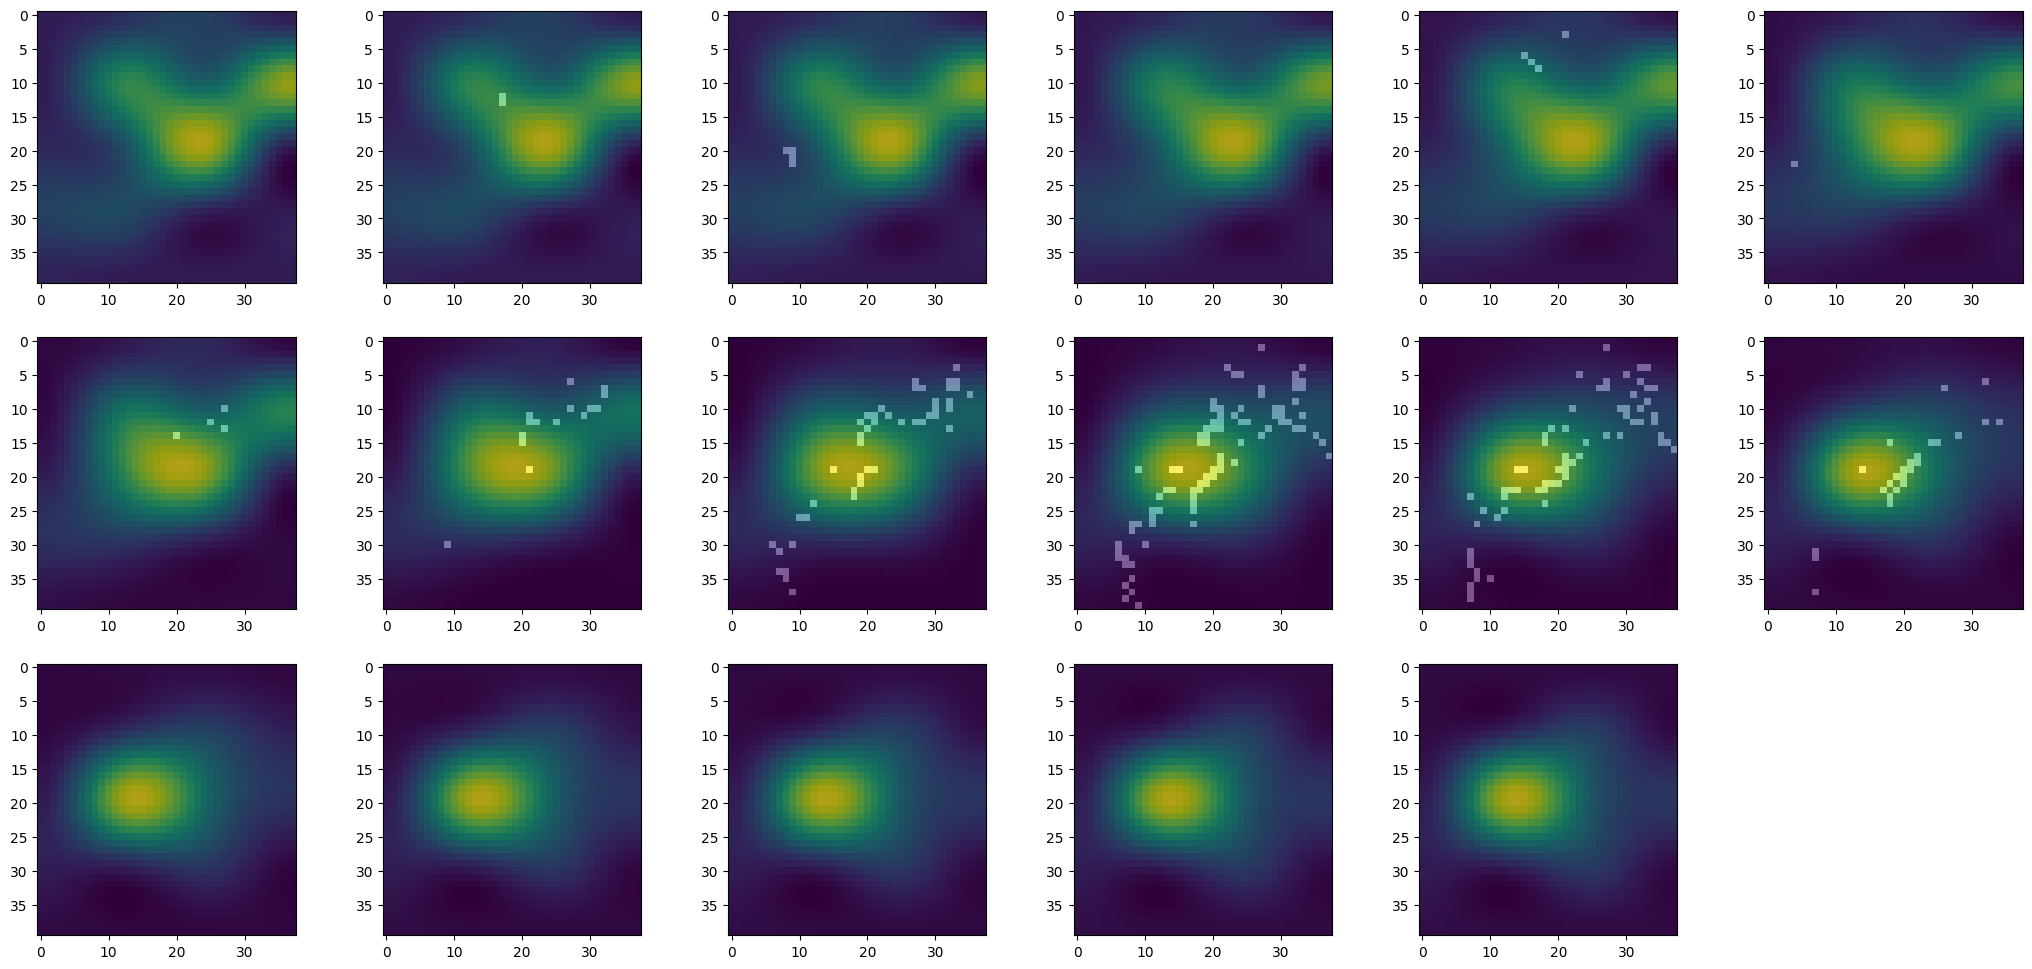

In [25]:
FP = subjects_labels[(subjects_labels.labels == 0) & (subjects_labels.preds == 1)].ID.values
print(len(FP))
display_aggregated(grads_final, skels, subjects, FP,
                   '1', 0.5)

17
N subjects: 17


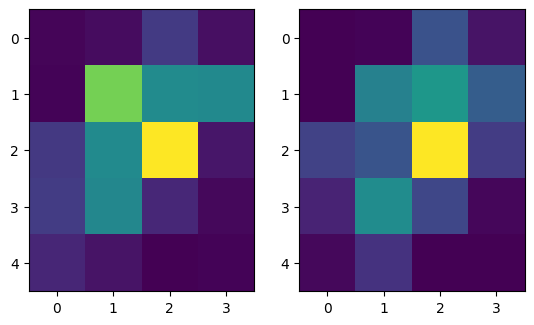

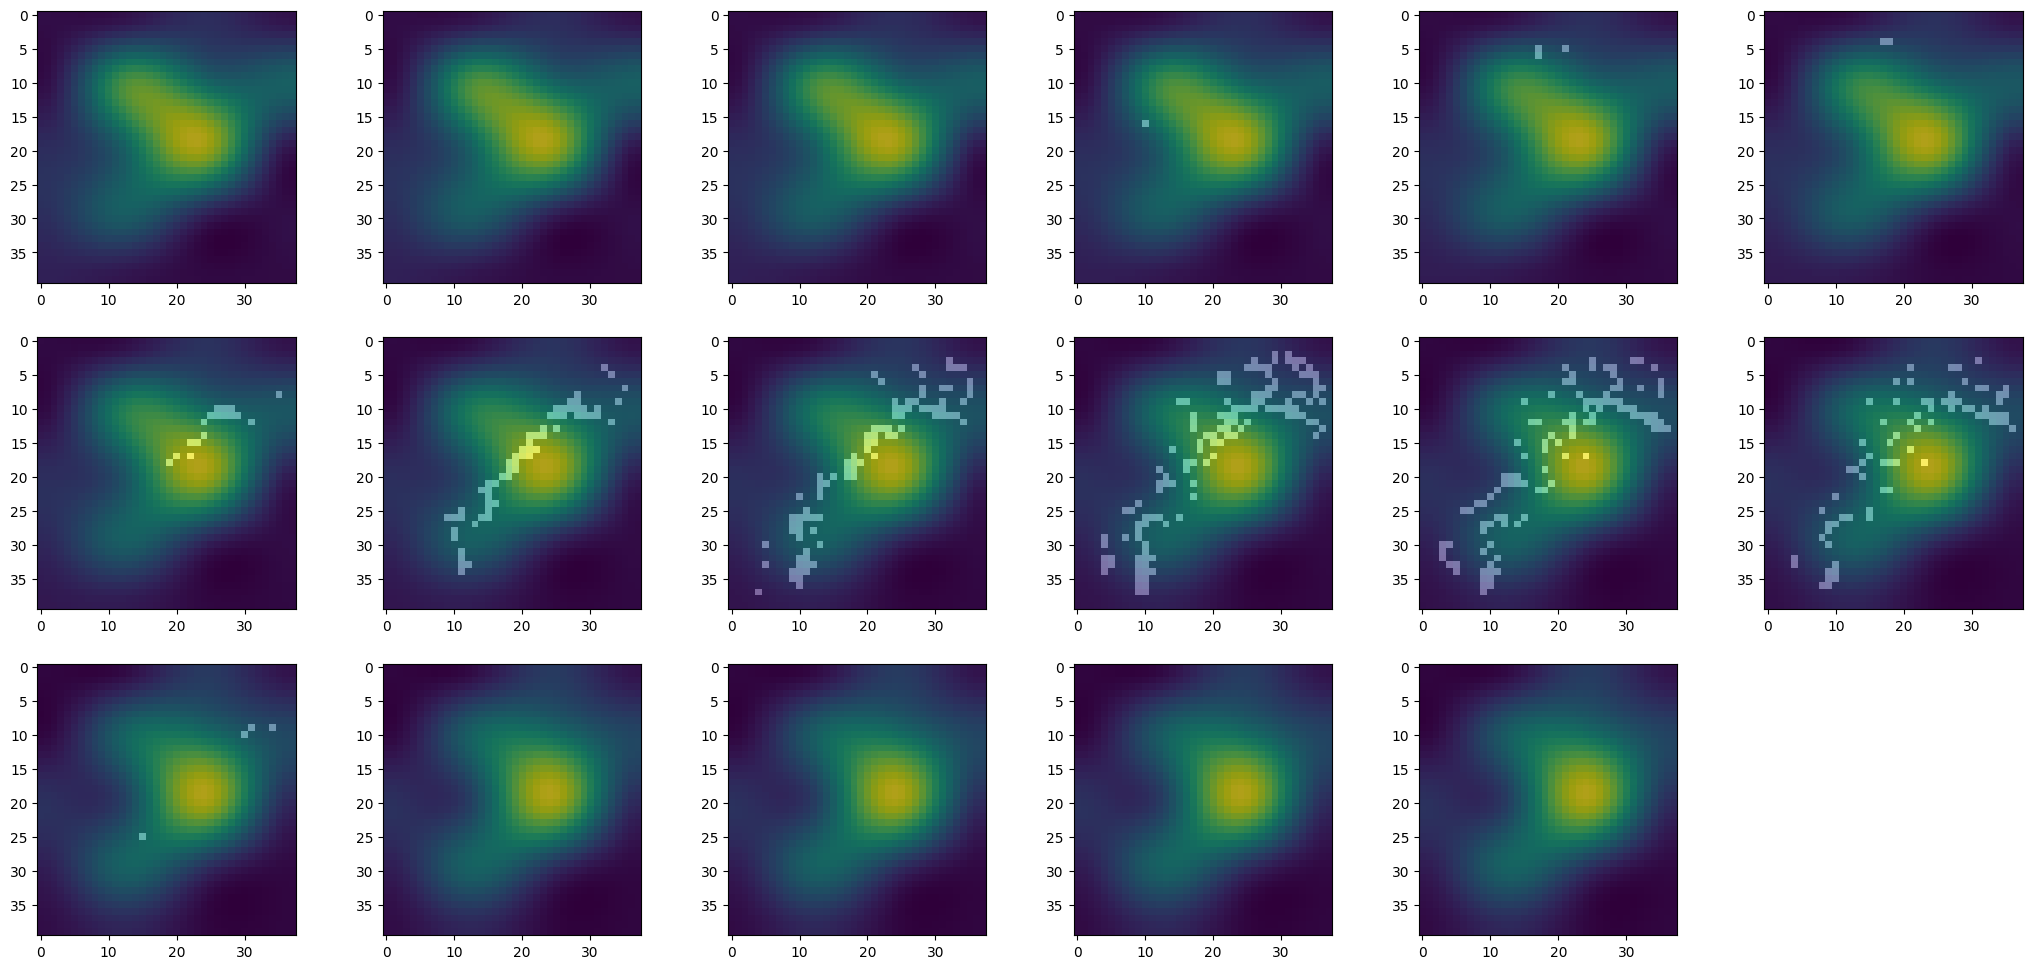

In [26]:
FN = subjects_labels[(subjects_labels.labels == 1) & (subjects_labels.preds == 0)].ID.values
print(len(FN))
display_aggregated(grads_final, skels, subjects, FN,
                   '0', 0.5)

# Redo with UKB pretrain

In [27]:
pretrained_grad_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/pretrained_UKB/ACCpatterns_supervised_results/attributions.pkl"

with open(pretrained_grad_path, 'rb') as file:
    grads_pretrained = pickle.load(file)

grads_pretrained

{'train': {'0': {'1-11LEBJO_t0': array([[[[0.0123101 , 0.00196603, 0.        , 0.        ],
            [0.03413706, 0.09701329, 0.        , 0.0147614 ],
            [0.05562712, 0.0102897 , 0.00582609, 0.00374927],
            [0.01108736, 0.        , 0.        , 0.05953   ],
            [0.        , 0.        , 0.        , 0.01049762]],
   
           [[0.02942465, 0.        , 0.        , 0.        ],
            [0.051464  , 0.        , 0.        , 0.00148715],
            [0.        , 0.01399914, 0.1570193 , 0.        ],
            [0.00236829, 0.        , 0.09775539, 0.07454165],
            [0.00279275, 0.0014871 , 0.        , 0.        ]]]],
         dtype=float32),
   '1-15LEHMI_t0': array([[[[0.00427025, 0.        , 0.        , 0.        ],
            [0.        , 0.        , 0.        , 0.        ],
            [0.        , 0.01556716, 0.        , 0.0133805 ],
            [0.        , 0.03791296, 0.01385602, 0.01443671],
            [0.        , 0.        , 0.00382174, 0.  

In [28]:
subjects_labels_pretrained = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/pretrained_UKB/ACCpatterns_supervised_results/ACC_outputs/full_outputs.csv")
subjects_labels_pretrained['preds'] = np.where(subjects_labels_pretrained.dim1 < subjects_labels_pretrained.dim2, 1, 0)
subjects_labels_pretrained

ID  labels      dim1      dim2  preds
0                            1-11LEBJO_t0       1  2.215609  1.456209      0
1                            1-15LEHMI_t0       0  1.613764  0.562327      0
2                            1-17COLMA_t0       0  3.136928  0.933136      0
3                            1-18ROUCO_t0       0  2.526997  0.307715      0
4                            1-20FORHU_t0       0  3.394029  3.879812      1
..                                    ...     ...       ...       ...    ...
336  sub-inhibition10_ses-pretraining_T1w       0  4.222938 -0.021712      0
337  sub-inhibition14_ses-pretraining_T1w       1  2.447269 -0.005493      0
338  sub-inhibition23_ses-pretraining_T1w       0  1.130132 -0.002941      0
339  sub-inhibition28_ses-pretraining_T1w       0  0.038771 -0.000761      0
340  sub-inhibition31_ses-pretraining_T1w       0  1.466048 -0.000276      0

[341 rows x 5 columns]

In [29]:
# get the IDs of True Positives and True Negatives
TP = subjects_labels_pretrained[(subjects_labels_pretrained.labels == 1) & (subjects_labels_pretrained.preds == 1)].ID.values
TN = subjects_labels_pretrained[(subjects_labels_pretrained.labels == 0) & (subjects_labels_pretrained.preds == 0)].ID.values

# get the IDs of True Positives and True Negatives
FP = subjects_labels_pretrained[(subjects_labels_pretrained.labels == 0) & (subjects_labels_pretrained.preds == 1)].ID.values
FN = subjects_labels_pretrained[(subjects_labels_pretrained.labels == 1) & (subjects_labels_pretrained.preds == 0)].ID.values

print(len(TP), len(TN), len(FP), len(FN))

41 187 10 103


N subjects: 41


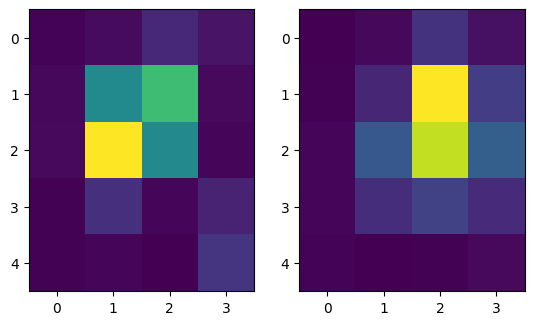

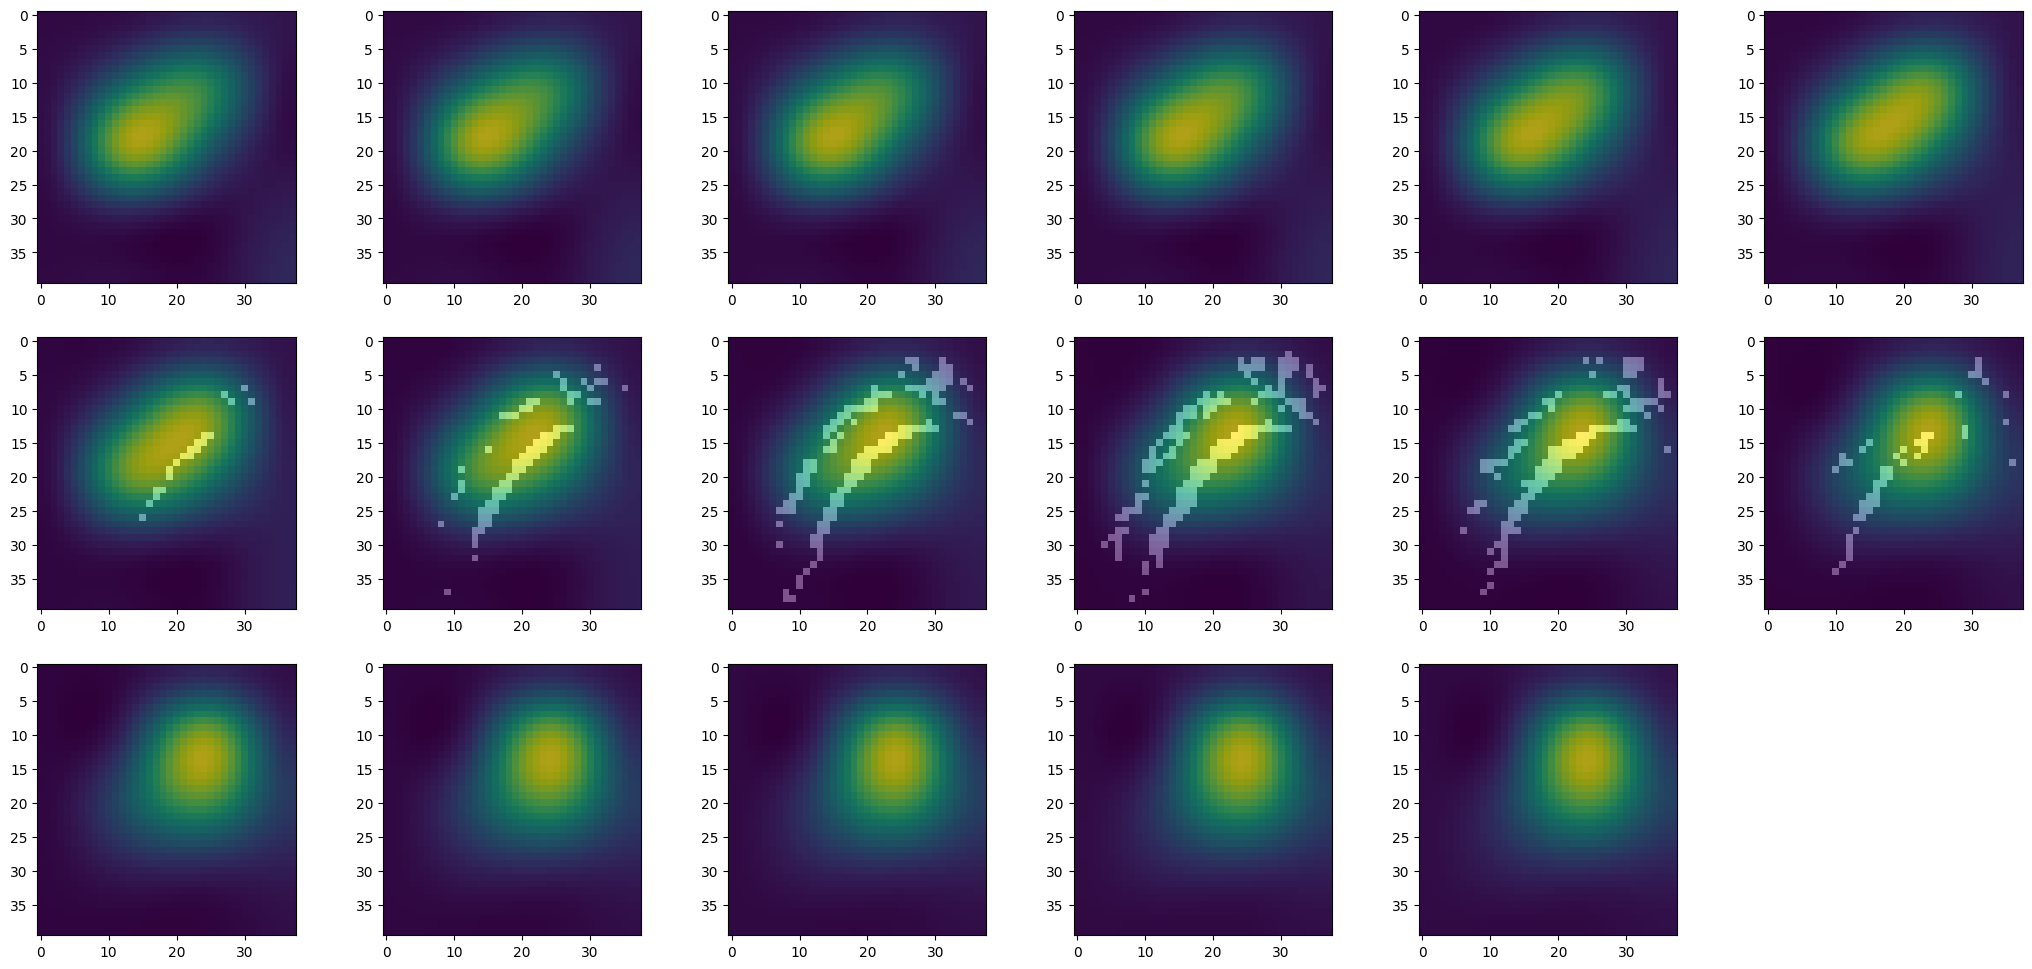

In [30]:
# display True Positives
display_aggregated(grads_pretrained, skels, subjects, TP,
                   '1', 0.5)

N subjects: 187


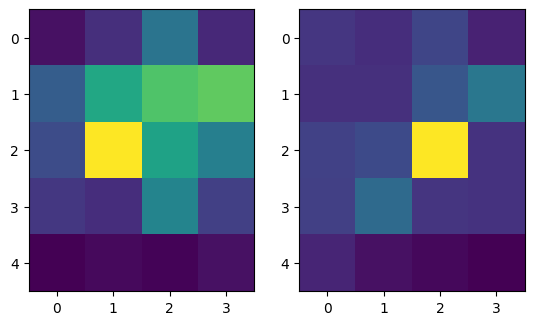

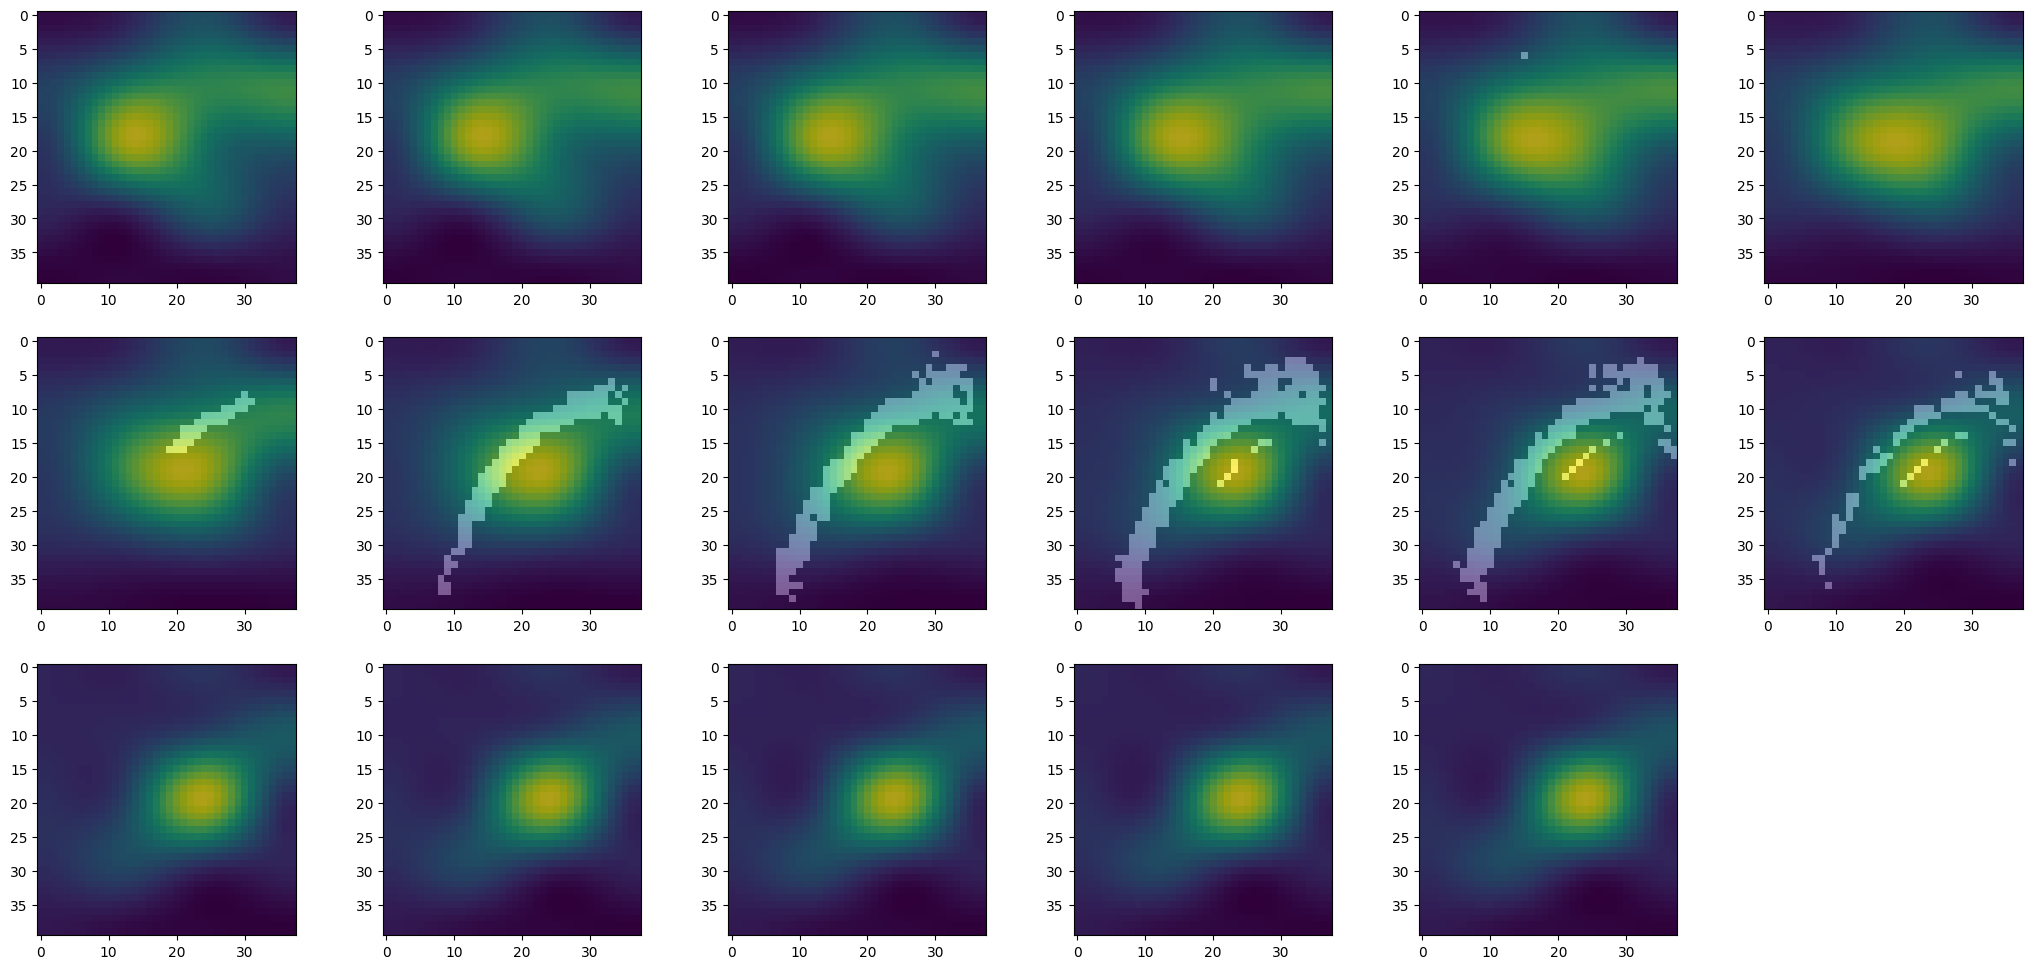

In [31]:
# display True Negatives
display_aggregated(grads_pretrained, skels, subjects, TN,
                   '0', 0.4)

N subjects: 10


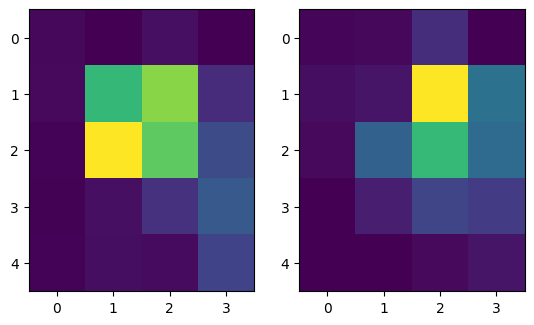

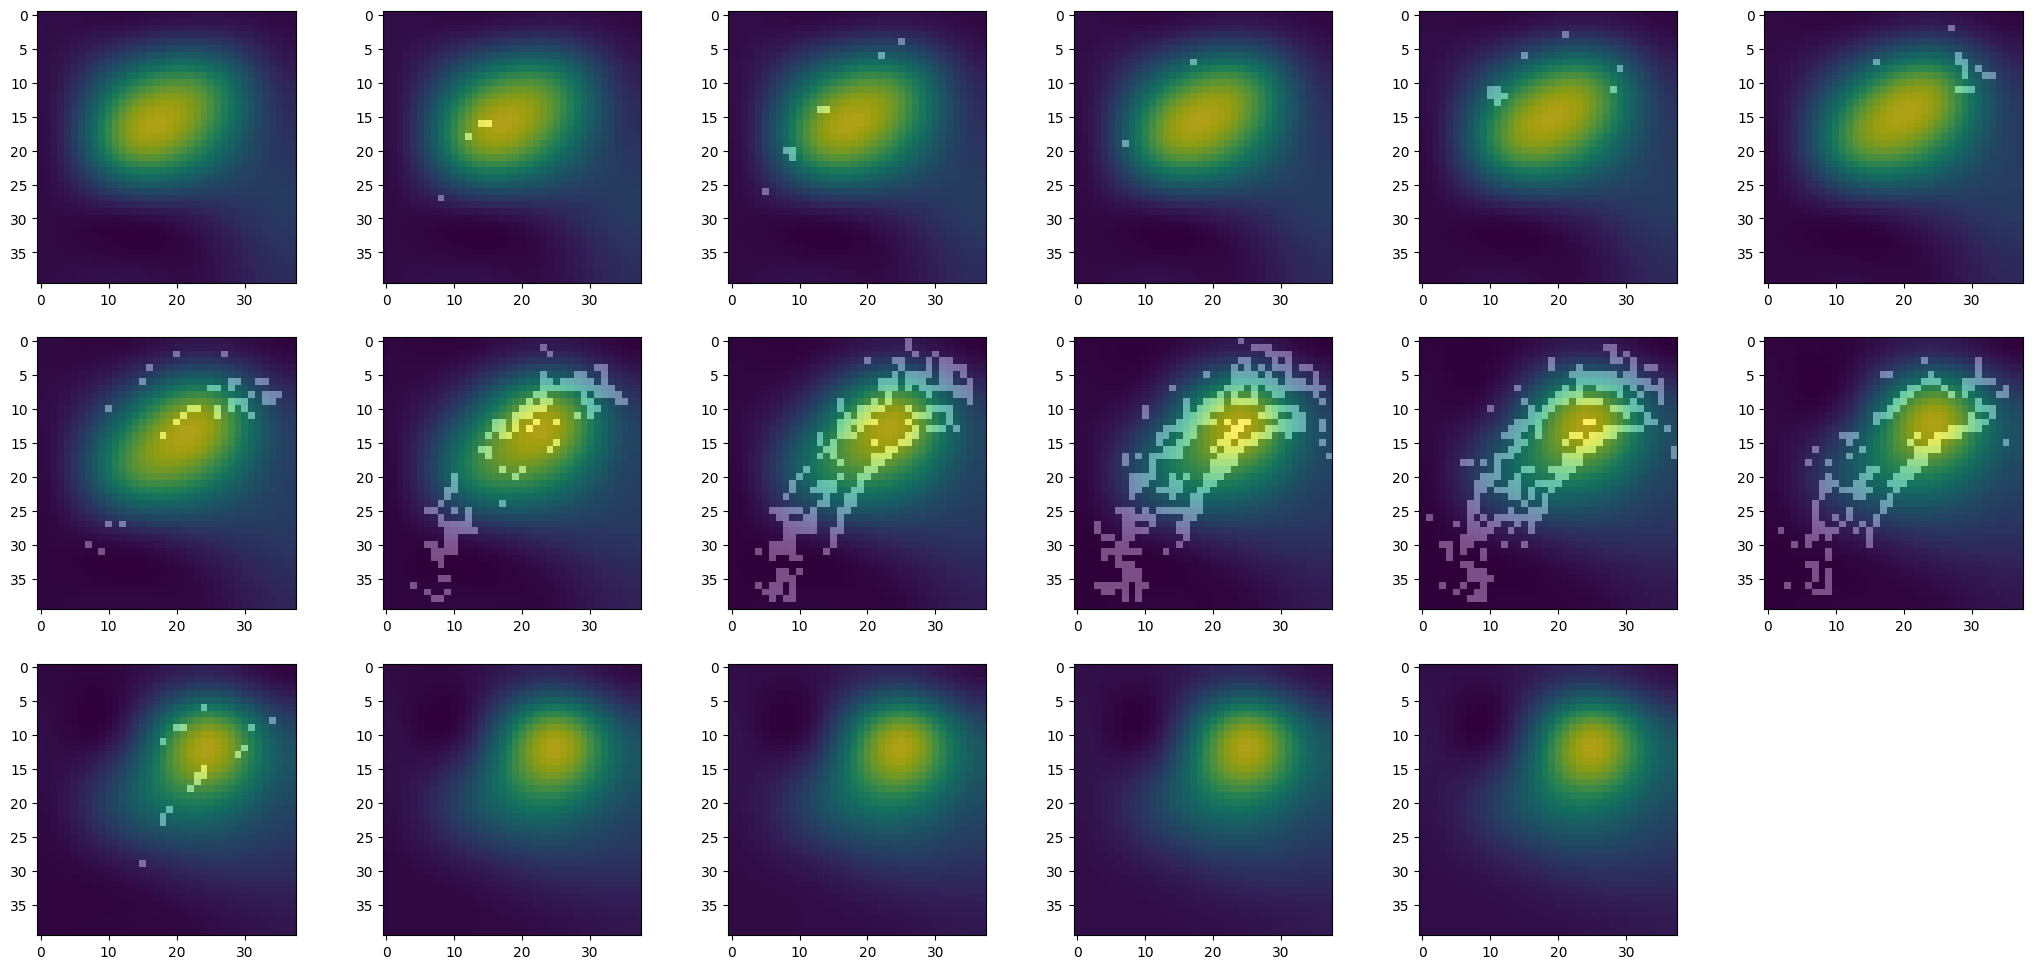

In [32]:
# display False Positives
display_aggregated(grads_pretrained, skels, subjects, FP,
                   '1', 0.58)

N subjects: 103


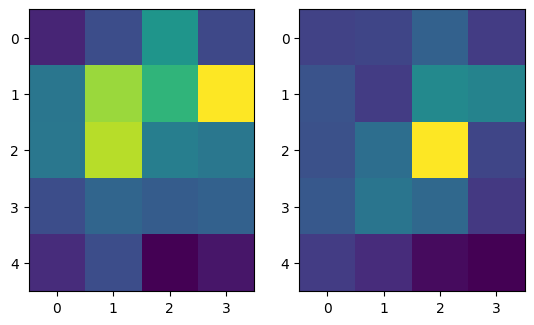

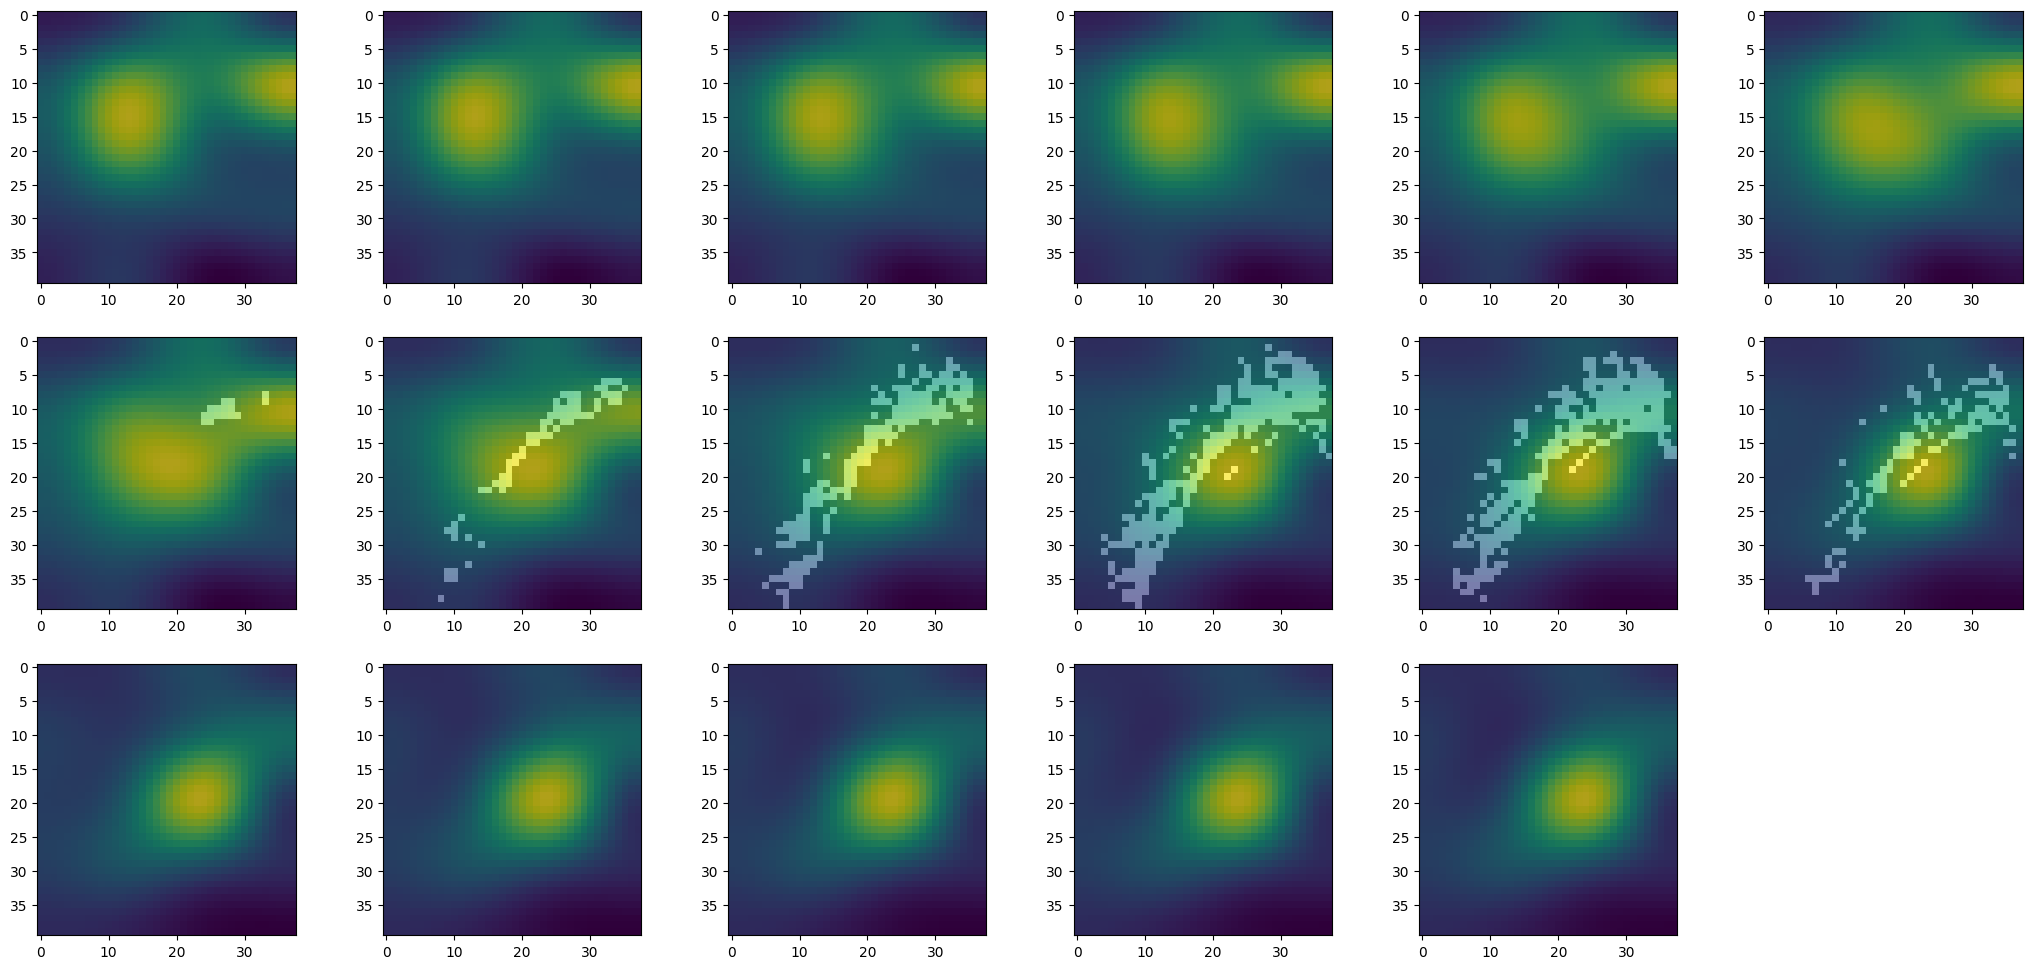

In [33]:
# display False Negatives
display_aggregated(grads_pretrained, skels, subjects, FN,
                   '0', 0.4)

# Redo with corpus callosum masked

In [40]:
recrop_skels = np.load("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton_no_cal.npy")

# binarize skels
print(np.unique(recrop_skels))
recrop_skels = np.where(recrop_skels >= 1, 1, 0)
print(np.unique(recrop_skels), recrop_skels.shape)

[  0.  30.  60. 100. 110. 120.]
[0 1] (341, 17, 40, 38, 1)


In [41]:
recrop_grad_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/no_cal/ACCpatterns_supervised_results/attributions.pkl"

with open(recrop_grad_path, 'rb') as file:
    grads_recrop = pickle.load(file)

grads_recrop

{'train': {'0': {'1-11LEBJO_t0': array([[[[1.5705347e-05, 1.1227969e-05, 1.0679208e-05, 1.2335280e-05],
            [3.5100427e-06, 0.0000000e+00, 0.0000000e+00, 2.0979303e-05],
            [1.7399991e-05, 0.0000000e+00, 0.0000000e+00, 2.3802466e-05],
            [1.9250889e-05, 1.0522353e-06, 2.7748579e-06, 8.2058045e-07],
            [4.5575820e-05, 2.2651839e-05, 1.6633594e-05, 1.6834645e-05]],
   
           [[1.4022667e-05, 2.4951514e-06, 6.1382298e-06, 1.0254609e-05],
            [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3780785e-06],
            [6.7885512e-06, 2.5306670e-06, 0.0000000e+00, 1.4294806e-05],
            [2.0478537e-05, 3.2893690e-06, 0.0000000e+00, 3.9672072e-06],
            [3.4989720e-05, 2.7653758e-05, 1.8923547e-05, 1.7402232e-05]]]],
         dtype=float32),
   '1-15LEHMI_t0': array([[[[0.        , 0.03542355, 0.07388918, 0.04924244],
            [0.02496568, 0.13394815, 0.11049183, 0.05402631],
            [0.01827705, 0.07915365, 0.02134837, 0.013812

In [42]:
subjects_labels_recrop = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/no_cal/ACCpatterns_supervised_results/ACC_outputs/full_outputs.csv")
subjects_labels_recrop['preds'] = np.where(subjects_labels_recrop.dim1 < subjects_labels_recrop.dim2, 1, 0)
subjects_labels_recrop

ID  labels      dim1      dim2  preds
0                            1-11LEBJO_t0       1 -0.003054  5.950629      1
1                            1-15LEHMI_t0       0  6.950698 -0.003685      0
2                            1-17COLMA_t0       0  5.812505 -0.002203      0
3                            1-18ROUCO_t0       0  5.461600 -0.000263      0
4                            1-20FORHU_t0       0  6.071097 -0.001974      0
..                                    ...     ...       ...       ...    ...
336  sub-inhibition10_ses-pretraining_T1w       0  3.724839  0.228104      0
337  sub-inhibition14_ses-pretraining_T1w       1  4.226637  0.004759      0
338  sub-inhibition23_ses-pretraining_T1w       0  2.610932  0.141619      0
339  sub-inhibition28_ses-pretraining_T1w       0  1.788947  0.999868      0
340  sub-inhibition31_ses-pretraining_T1w       0  5.047412 -0.001313      0

[341 rows x 5 columns]

In [43]:
# get the IDs of True Positives and True Negatives
TP = subjects_labels_recrop[(subjects_labels_recrop.labels == 1) & (subjects_labels_recrop.preds == 1)].ID.values
TN = subjects_labels_recrop[(subjects_labels_recrop.labels == 0) & (subjects_labels_recrop.preds == 0)].ID.values

# get the IDs of True Positives and True Negatives
FP = subjects_labels_recrop[(subjects_labels_recrop.labels == 0) & (subjects_labels_recrop.preds == 1)].ID.values
FN = subjects_labels_recrop[(subjects_labels_recrop.labels == 1) & (subjects_labels_recrop.preds == 0)].ID.values

print(len(TP), len(TN), len(FP), len(FN))

133 187 10 11


N subjects: 133


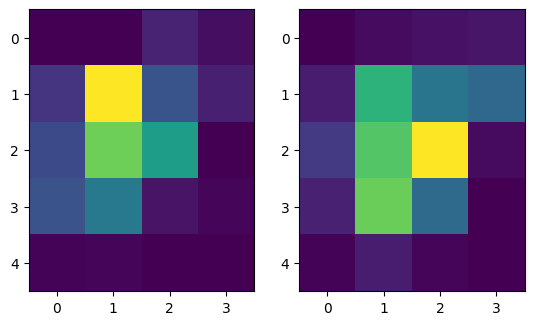

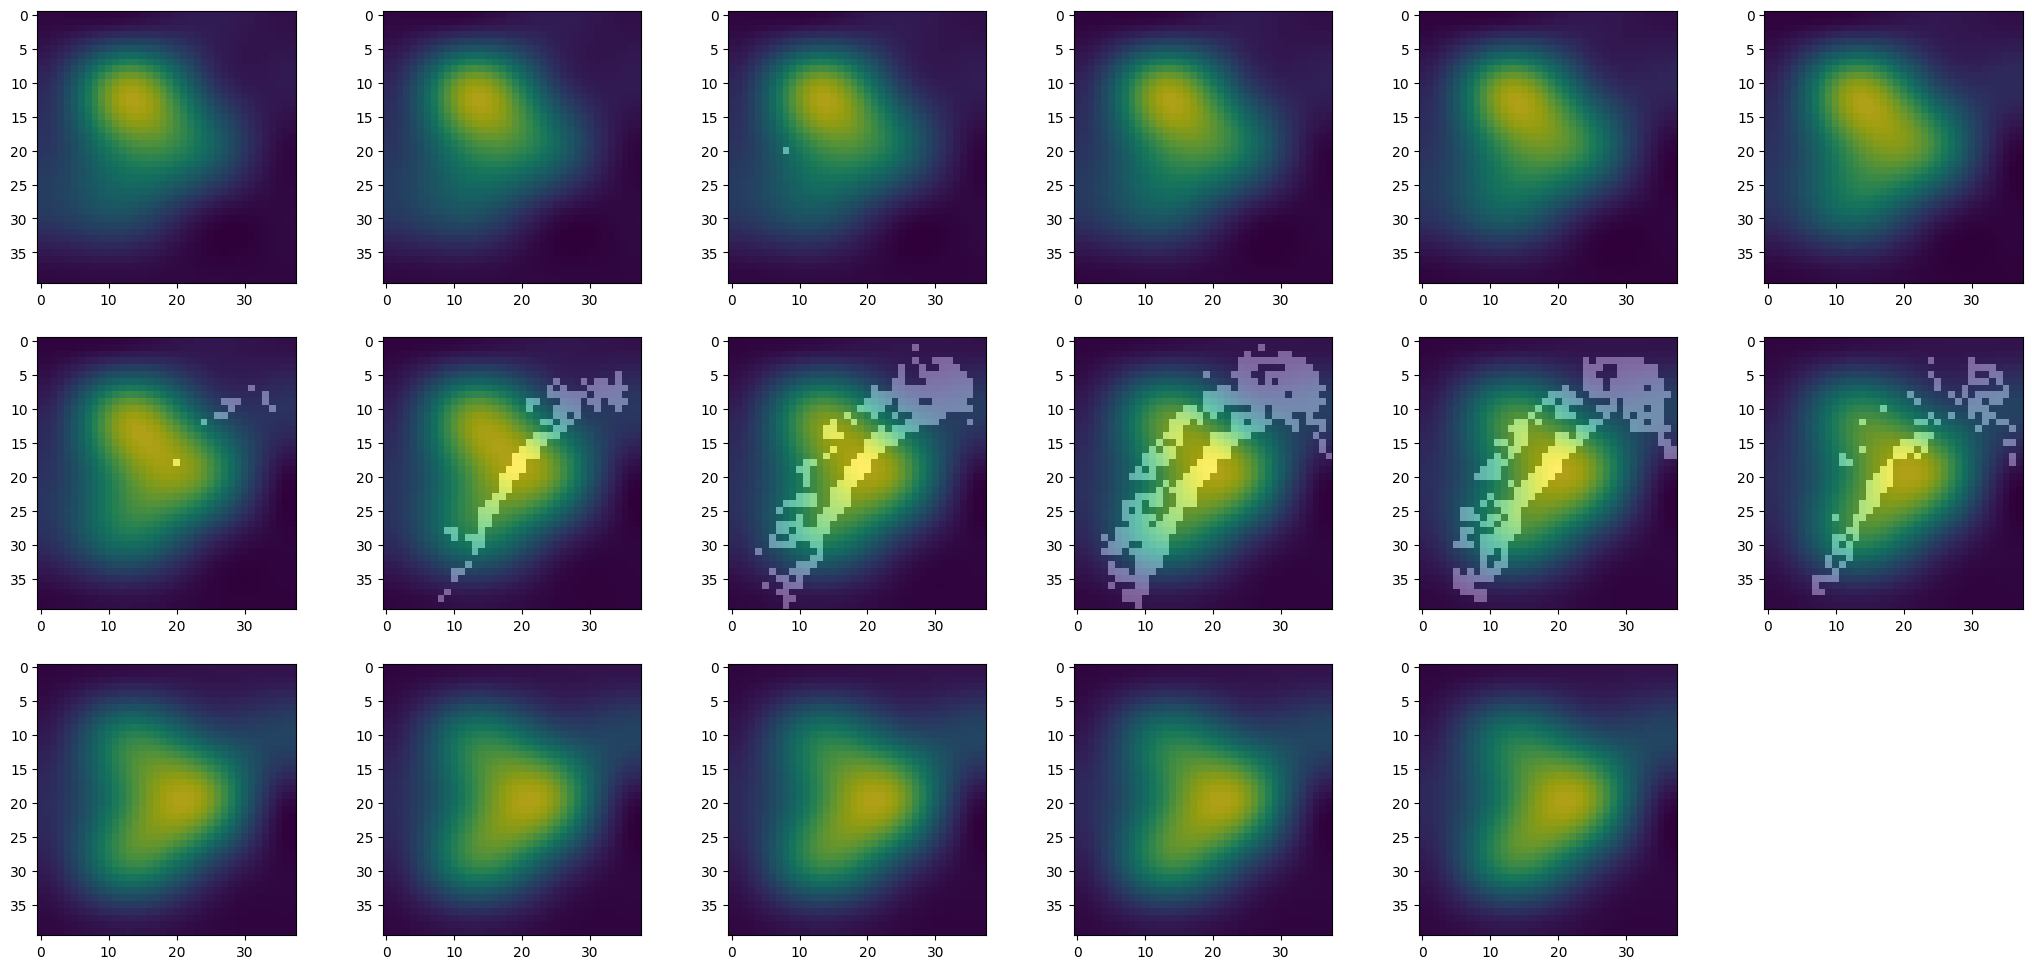

In [44]:
# display True Positives
display_aggregated(grads_recrop, recrop_skels, subjects, TP,
                   '1', 0.42)

N subjects: 187


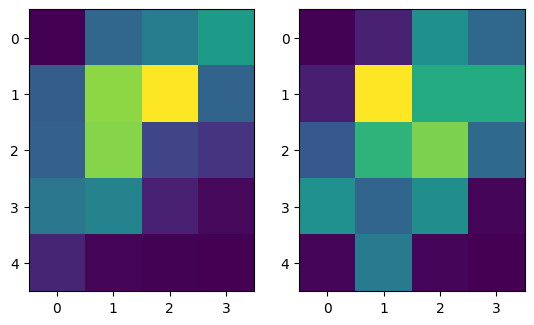

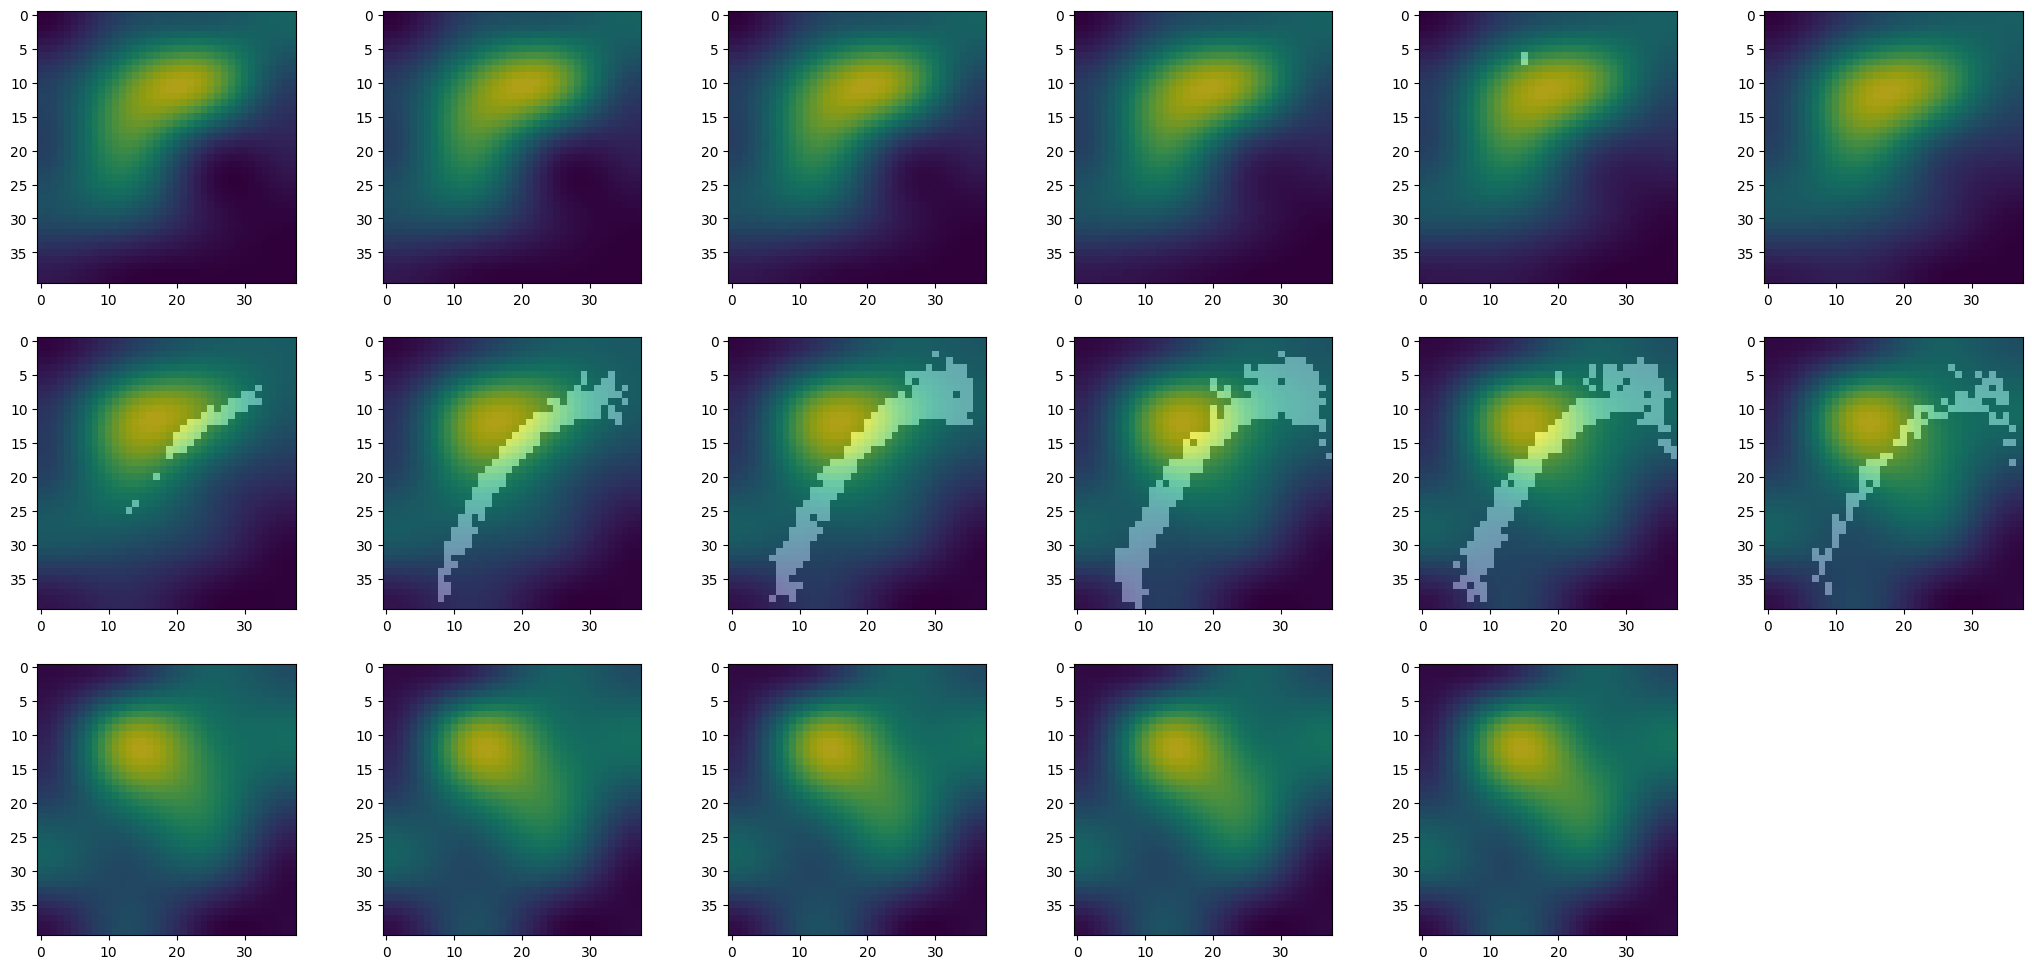

In [45]:
# display True Negatives
display_aggregated(grads_recrop, recrop_skels, subjects, TN,
                   '0', 0.4)

N subjects: 10


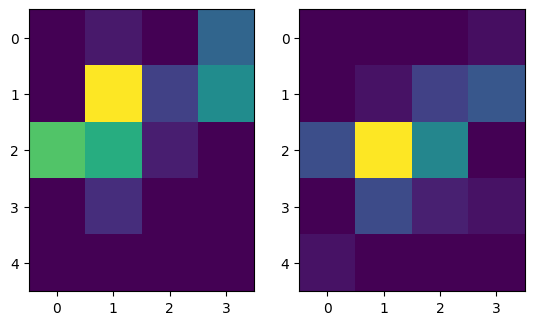

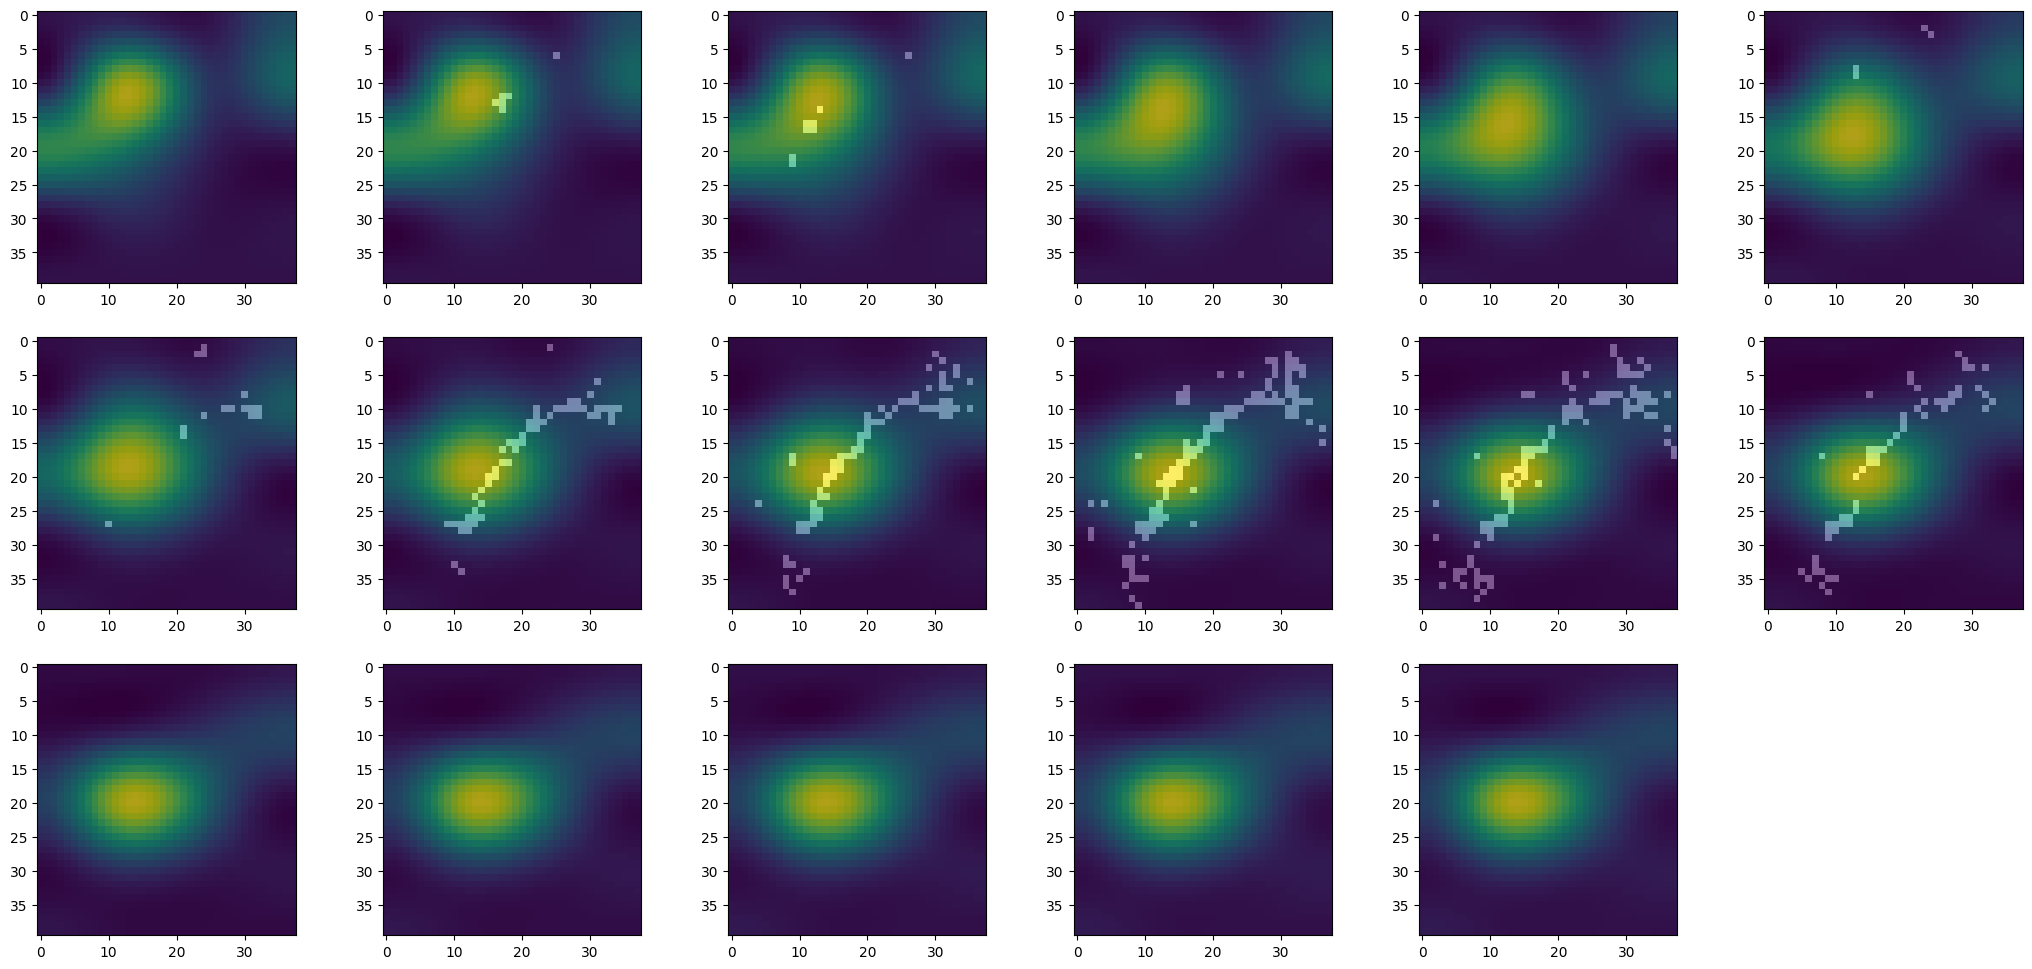

In [46]:
# display False Positives
display_aggregated(grads_recrop, recrop_skels, subjects, FP,
                   '1', 0.58)

N subjects: 11


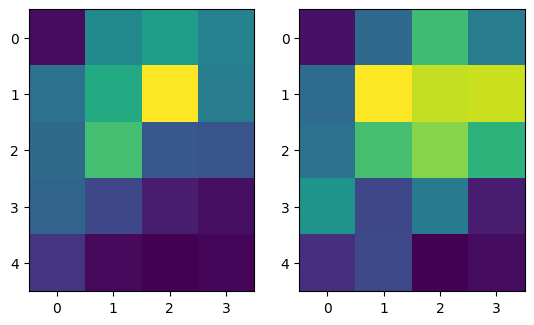

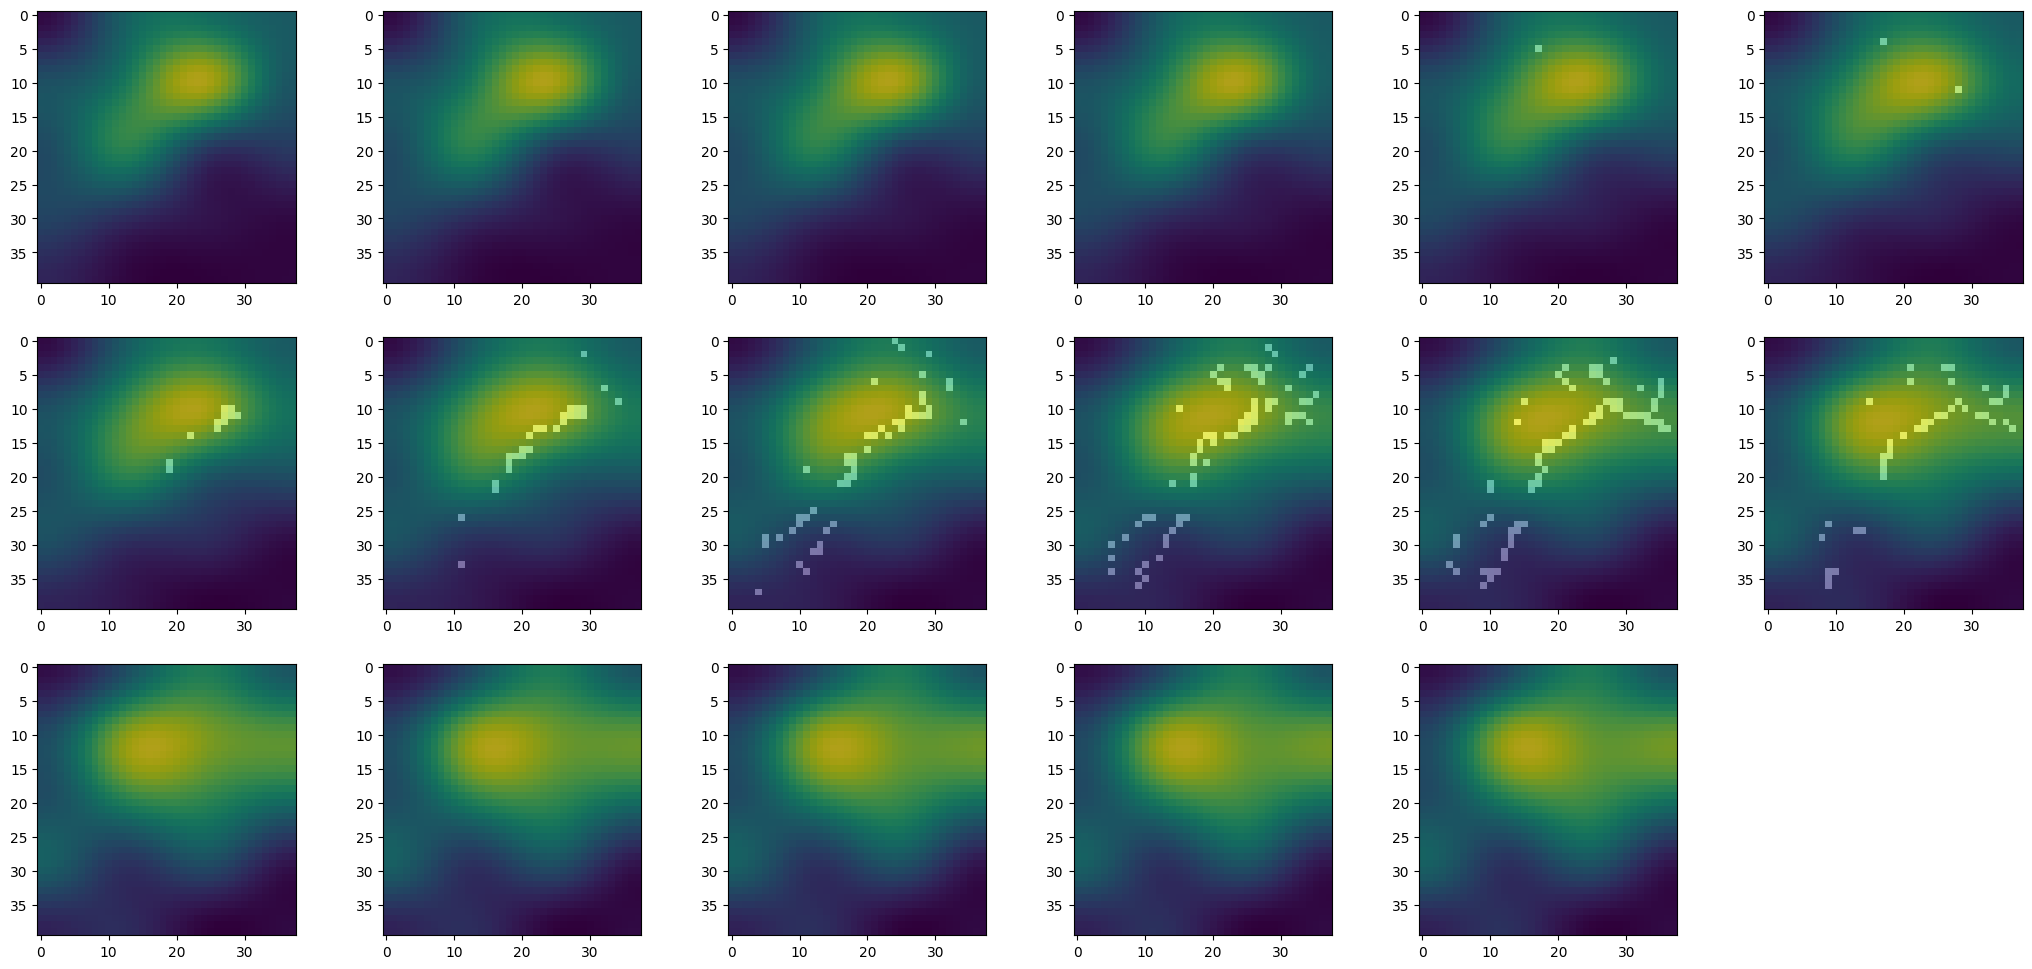

In [47]:
# display False Negatives
display_aggregated(grads_recrop, recrop_skels, subjects, FN,
                   '0', 0.4)

## with UKB pretrain

84 150 47 60
N subjects: 84


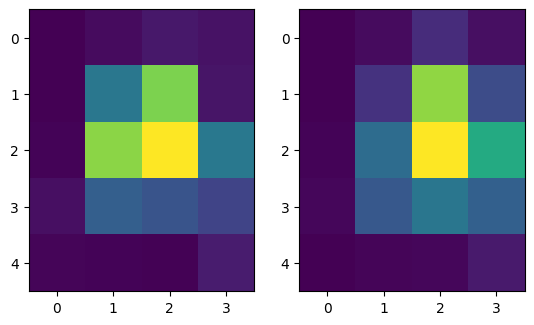

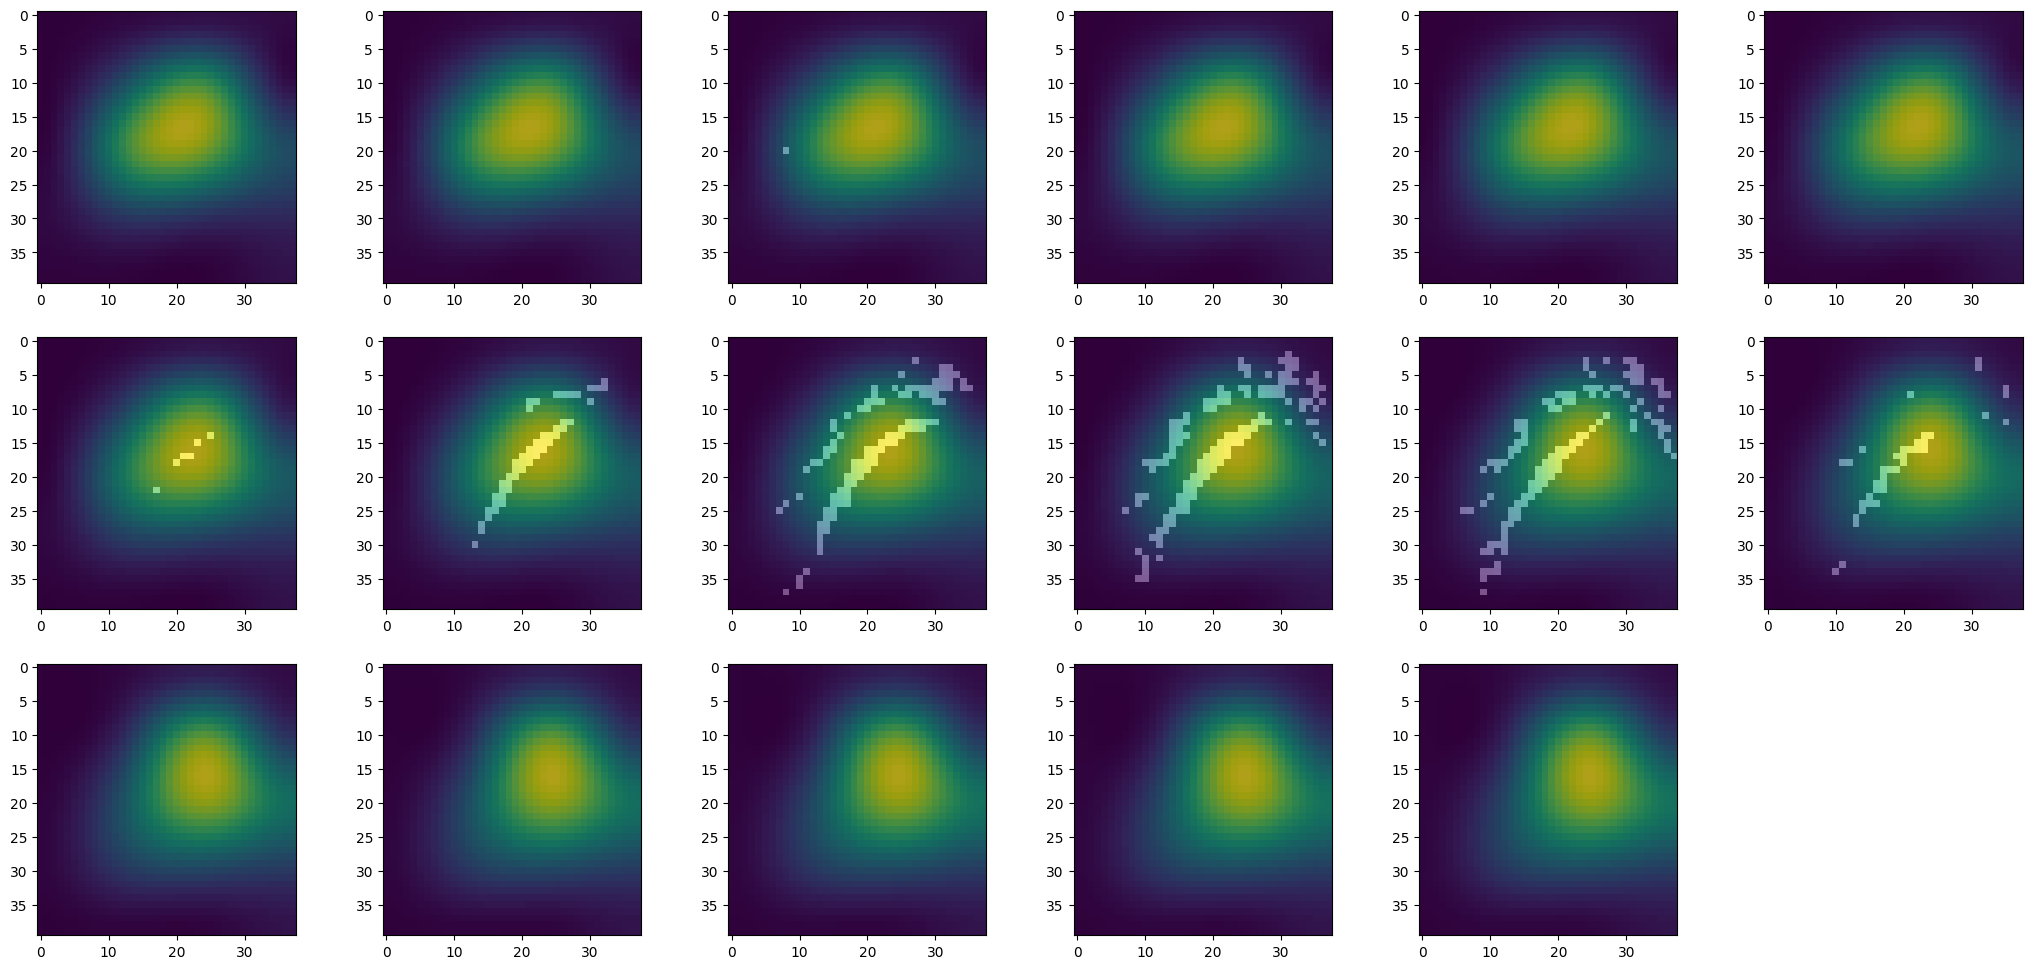

N subjects: 150


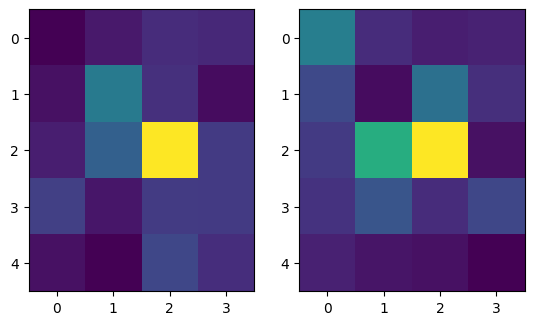

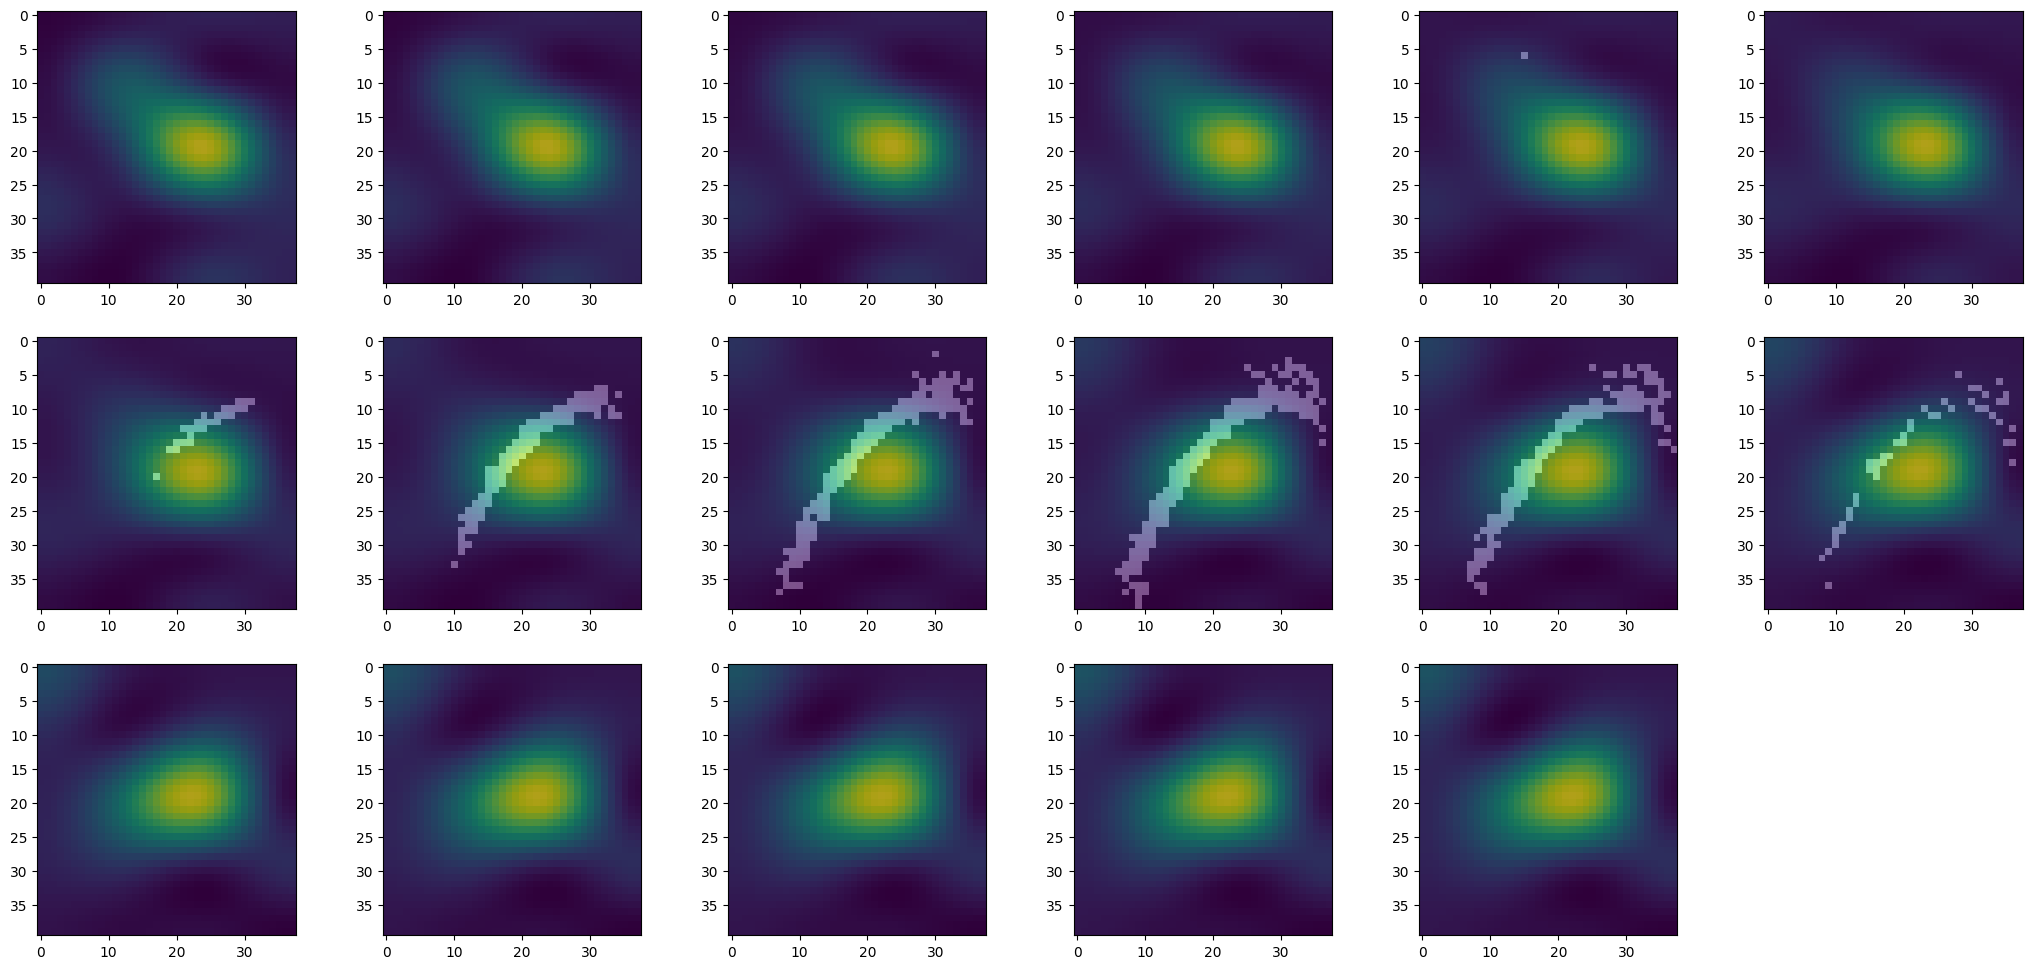

N subjects: 47


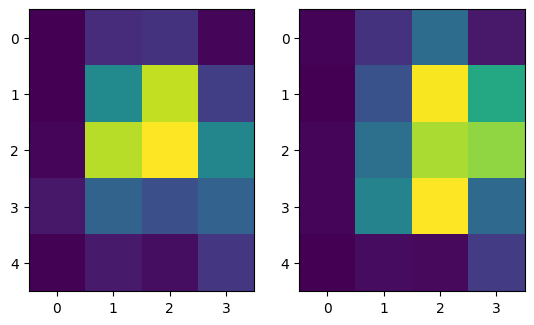

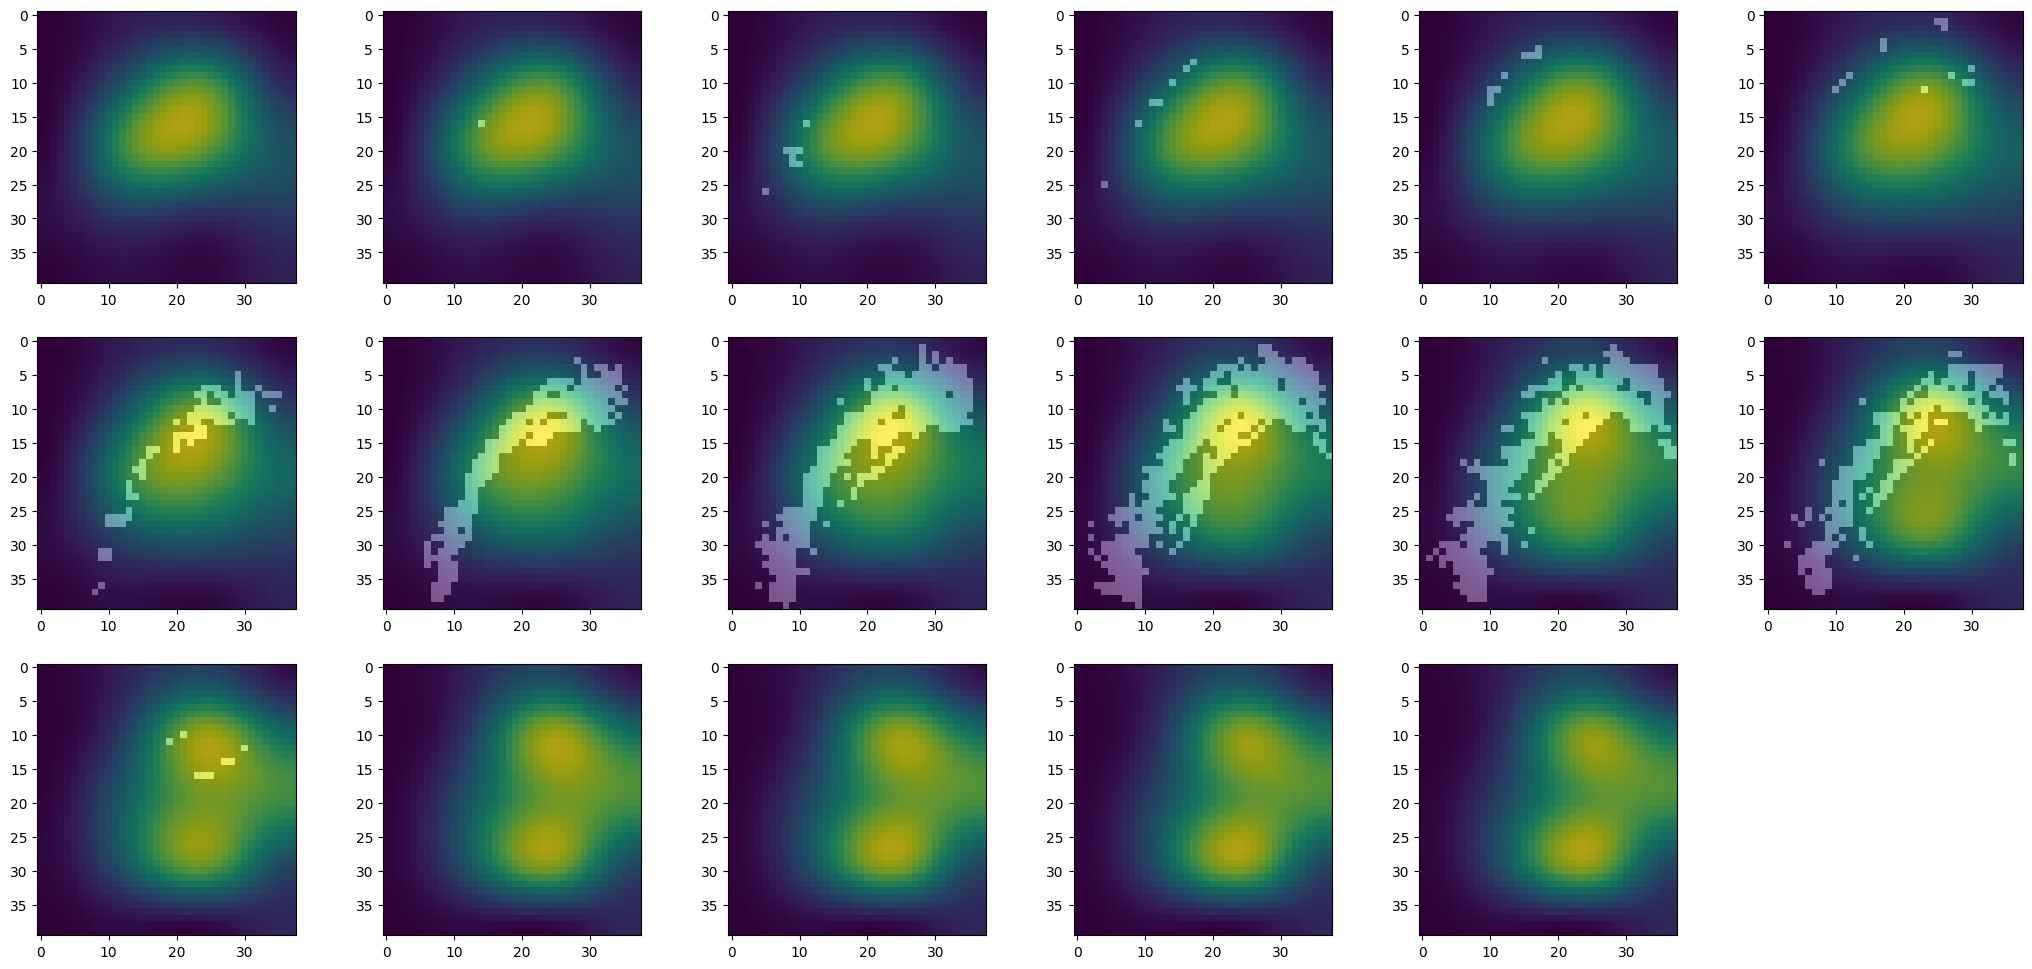

N subjects: 60


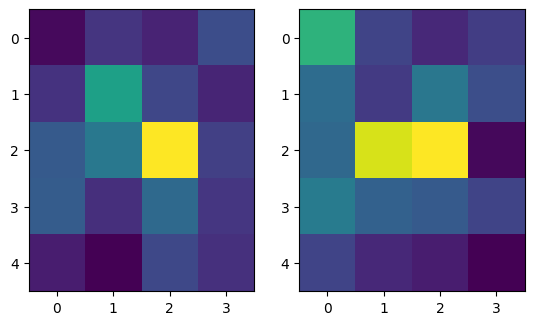

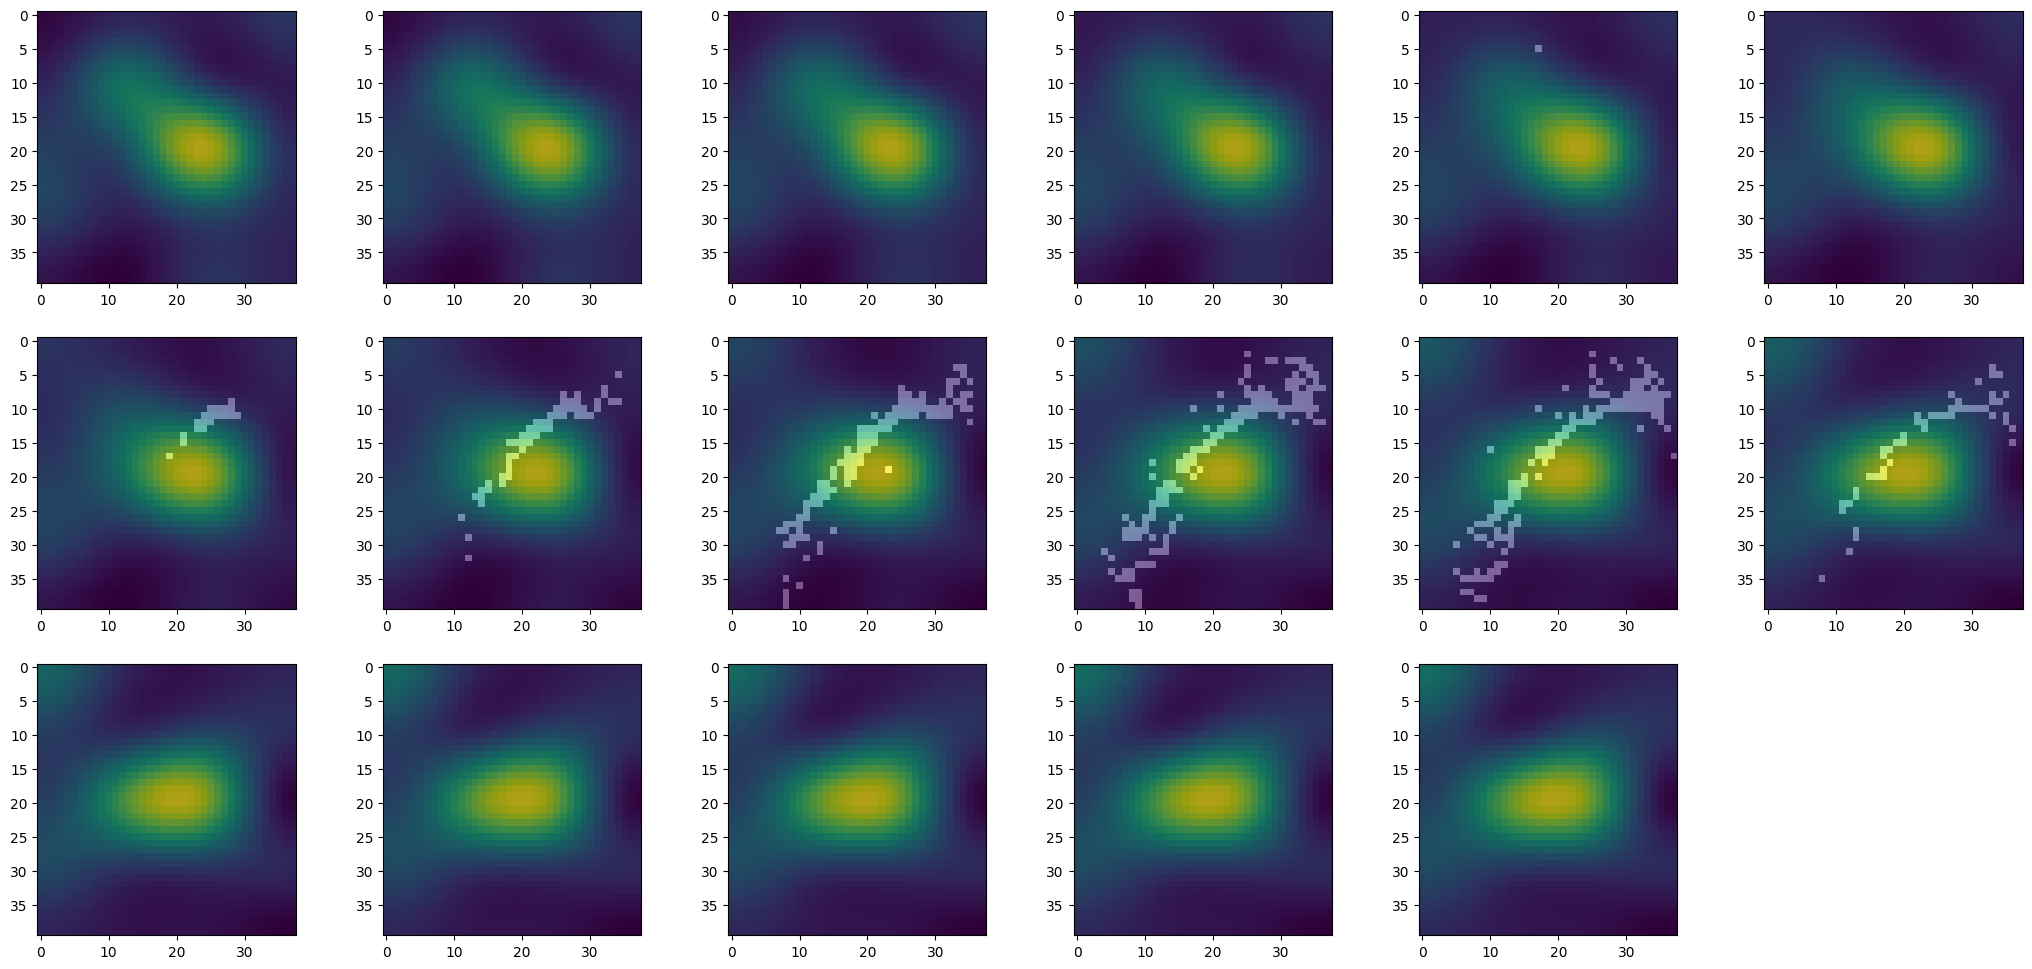

In [48]:
recrop_grad_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/no_cal_pretrained/ACCpatterns_supervised_results/attributions.pkl"

with open(recrop_grad_path, 'rb') as file:
    grads_recrop = pickle.load(file)


subjects_labels_recrop = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/no_cal_pretrained/ACCpatterns_supervised_results/ACC_outputs/full_outputs.csv")
subjects_labels_recrop['preds'] = np.where(subjects_labels_recrop.dim1 < subjects_labels_recrop.dim2, 1, 0)

# get the IDs of True Positives and True Negatives
TP = subjects_labels_recrop[(subjects_labels_recrop.labels == 1) & (subjects_labels_recrop.preds == 1)].ID.values
TN = subjects_labels_recrop[(subjects_labels_recrop.labels == 0) & (subjects_labels_recrop.preds == 0)].ID.values

# get the IDs of True Positives and True Negatives
FP = subjects_labels_recrop[(subjects_labels_recrop.labels == 0) & (subjects_labels_recrop.preds == 1)].ID.values
FN = subjects_labels_recrop[(subjects_labels_recrop.labels == 1) & (subjects_labels_recrop.preds == 0)].ID.values

print(len(TP), len(TN), len(FP), len(FN))

# display True Positives
display_aggregated(grads_recrop, recrop_skels, subjects, TP,
                   '1', 0.42)

# display True Negatives
display_aggregated(grads_recrop, recrop_skels, subjects, TN,
                   '0', 0.4)

# display False Positives
display_aggregated(grads_recrop, recrop_skels, subjects, FP,
                   '1', 0.58)

# display False Negatives
display_aggregated(grads_recrop, recrop_skels, subjects, FN,
                   '0', 0.4)

In [56]:
subjects_labels_recrop

ID  labels      dim1      dim2  preds
0                            1-11LEBJO_t0       1 -0.001287  1.253716      1
1                            1-15LEHMI_t0       0 -0.003115 -0.002272      1
2                            1-17COLMA_t0       0  0.947055 -0.010775      0
3                            1-18ROUCO_t0       0  0.493667 -0.008491      0
4                            1-20FORHU_t0       0 -0.014395  0.805163      1
..                                    ...     ...       ...       ...    ...
336  sub-inhibition10_ses-pretraining_T1w       0  3.081928 -0.021326      0
337  sub-inhibition14_ses-pretraining_T1w       1  2.088315 -0.015847      0
338  sub-inhibition23_ses-pretraining_T1w       0 -0.016724 -0.000599      1
339  sub-inhibition28_ses-pretraining_T1w       0 -0.000138  0.066892      1
340  sub-inhibition31_ses-pretraining_T1w       0  1.191988 -0.006925      0

[341 rows x 5 columns]

Chosen subject: a0020_t1_s03
Corresponding index: 38
True label: 0
Predicted label: 0


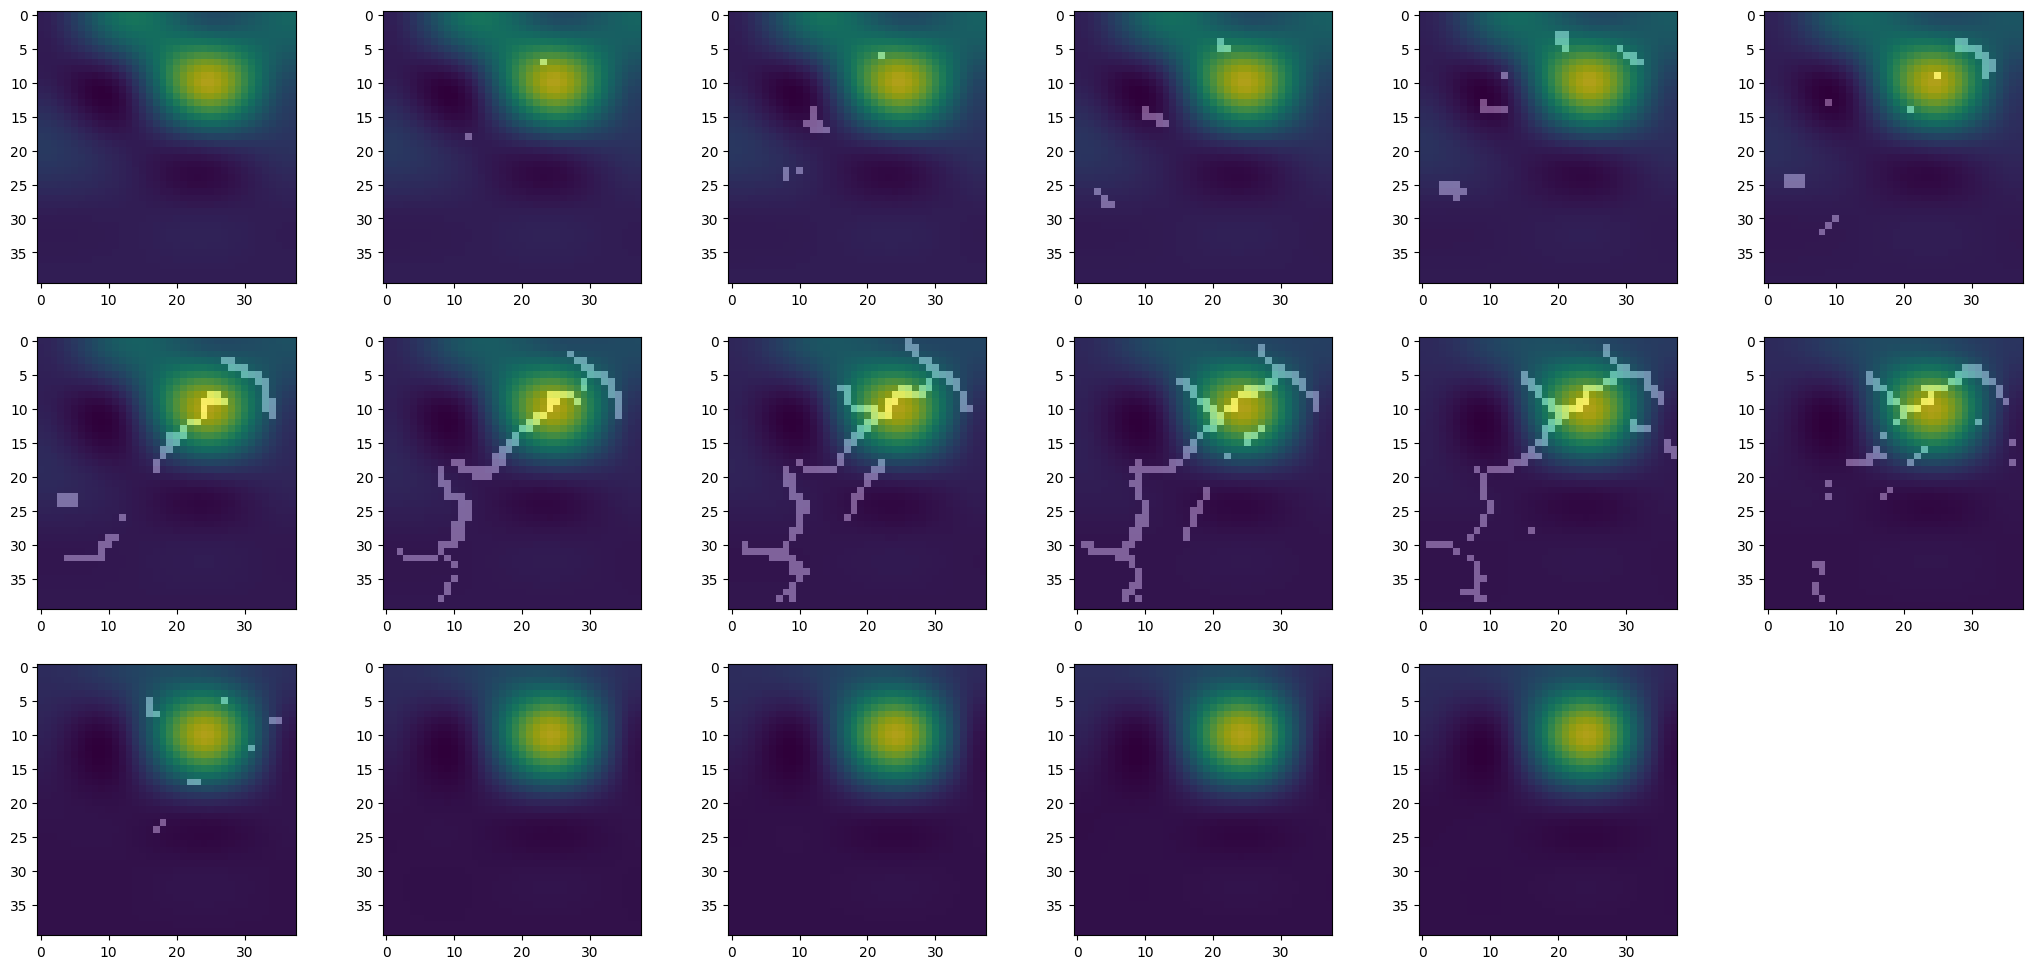

In [88]:
sub_name = np.random.choice(TN)
grad_cam_sub(sub_name, grads_recrop, recrop_skels, subjects, subjects_labels_recrop)